# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

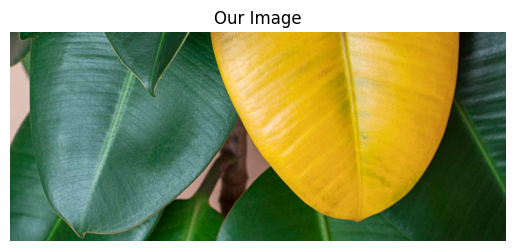

In [1]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img_part5 = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img_part5)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [2]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Uploading Image

(np.float64(-0.5), np.float64(611.5), np.float64(407.5), np.float64(-0.5))

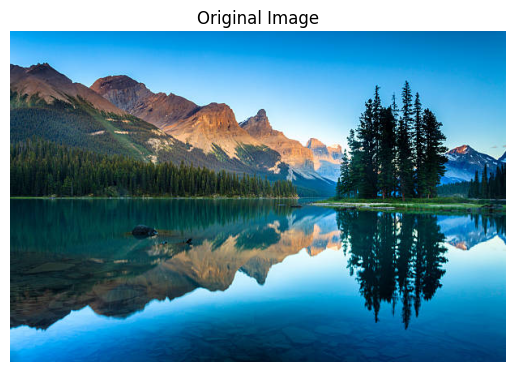

In [3]:
# @title Default title text
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np
import cv2
import base64

base64_image = """/9j/4AAQSkZJRgABAQEBLAEsAAD/4QDDRXhpZgAASUkqAAgAAAAEAA4BAgBfAAAAPgAAAJiCAgAOAAAAnQAAABoBBQABAAAAqwAAABsBBQABAAAAswAAAAAAAABUaGUgd29ybGQtZmFtb3VzIFNwaXJpdCBJc2xhbmQgYW5kIE1hbGlnbmUgTGFrZSBhdCBkdXNrLiBKYXNwZXIgTmF0aW9uYWwgUGFyaywgQWxiZXJ0YSwgQ2FuYWRhLk1hcmsgU2tlcmJpbmVrLAEAAAEAAAAsAQAAAQAAAP/hBexodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0i77u/IiBpZD0iVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkIj8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iPgoJPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KCQk8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIHhtbG5zOklwdGM0eG1wQ29yZT0iaHR0cDovL2lwdGMub3JnL3N0ZC9JcHRjNHhtcENvcmUvMS4wL3htbG5zLyIgICB4bWxuczpHZXR0eUltYWdlc0dJRlQ9Imh0dHA6Ly94bXAuZ2V0dHlpbWFnZXMuY29tL2dpZnQvMS4wLyIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIiB4bWxuczpwbHVzPSJodHRwOi8vbnMudXNlcGx1cy5vcmcvbGRmL3htcC8xLjAvIiAgeG1sbnM6aXB0Y0V4dD0iaHR0cDovL2lwdGMub3JnL3N0ZC9JcHRjNHhtcEV4dC8yMDA4LTAyLTI5LyIgeG1sbnM6eG1wUmlnaHRzPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvcmlnaHRzLyIgZGM6UmlnaHRzPSJNYXJrIFNrZXJiaW5layIgcGhvdG9zaG9wOkNyZWRpdD0iR2V0dHkgSW1hZ2VzIiBHZXR0eUltYWdlc0dJRlQ6QXNzZXRJRD0iNDg1MzcxNTU3IiB4bXBSaWdodHM6V2ViU3RhdGVtZW50PSJodHRwczovL3d3dy5pc3RvY2twaG90by5jb20vbGVnYWwvbGljZW5zZS1hZ3JlZW1lbnQ/dXRtX21lZGl1bT1vcmdhbmljJmFtcDt1dG1fc291cmNlPWdvb2dsZSZhbXA7dXRtX2NhbXBhaWduPWlwdGN1cmwiIHBsdXM6RGF0YU1pbmluZz0iaHR0cDovL25zLnVzZXBsdXMub3JnL2xkZi92b2NhYi9ETUktUFJPSElCSVRFRC1FWENFUFRTRUFSQ0hFTkdJTkVJTkRFWElORyIgPgo8ZGM6Y3JlYXRvcj48cmRmOlNlcT48cmRmOmxpPkdsb3dpbmdFYXJ0aDwvcmRmOmxpPjwvcmRmOlNlcT48L2RjOmNyZWF0b3I+PGRjOmRlc2NyaXB0aW9uPjxyZGY6QWx0PjxyZGY6bGkgeG1sOmxhbmc9IngtZGVmYXVsdCI+VGhlIHdvcmxkLWZhbW91cyBTcGlyaXQgSXNsYW5kIGFuZCBNYWxpZ25lIExha2UgYXQgZHVzay4gSmFzcGVyIE5hdGlvbmFsIFBhcmssIEFsYmVydGEsIENhbmFkYS48L3JkZjpsaT48L3JkZjpBbHQ+PC9kYzpkZXNjcmlwdGlvbj4KPHBsdXM6TGljZW5zb3I+PHJkZjpTZXE+PHJkZjpsaSByZGY6cGFyc2VUeXBlPSdSZXNvdXJjZSc+PHBsdXM6TGljZW5zb3JVUkw+aHR0cHM6Ly93d3cuaXN0b2NrcGhvdG8uY29tL3Bob3RvL2xpY2Vuc2UtZ200ODUzNzE1NTctP3V0bV9tZWRpdW09b3JnYW5pYyZhbXA7dXRtX3NvdXJjZT1nb29nbGUmYW1wO3V0bV9jYW1wYWlnbj1pcHRjdXJsPC9wbHVzOkxpY2Vuc29yVVJMPjwvcmRmOmxpPjwvcmRmOlNlcT48L3BsdXM6TGljZW5zb3I+CgkJPC9yZGY6RGVzY3JpcHRpb24+Cgk8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo8P3hwYWNrZXQgZW5kPSJ3Ij8+Cv/tALZQaG90b3Nob3AgMy4wADhCSU0EBAAAAAAAmRwCUAAMR2xvd2luZ0VhcnRoHAJ4AF9UaGUgd29ybGQtZmFtb3VzIFNwaXJpdCBJc2xhbmQgYW5kIE1hbGlnbmUgTGFrZSBhdCBkdXNrLiBKYXNwZXIgTmF0aW9uYWwgUGFyaywgQWxiZXJ0YSwgQ2FuYWRhLhwCdAAOTWFyayBTa2VyYmluZWscAm4ADEdldHR5IEltYWdlcwD/2wBDAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEYIx8lJCIfIiEmKzcvJik0KSEiMEExNDk7Pj4+JS5ESUM8SDc9Pjv/2wBDAQoLCw4NDhwQEBw7KCIoOzs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozv/wgARCAGYAmQDAREAAhEBAxEB/8QAGwAAAwEBAQEBAAAAAAAAAAAAAAECAwQFBgf/xAAaAQEBAQEBAQEAAAAAAAAAAAAAAQIDBAUG/9oADAMBAAIQAxAAAAFfa/OIQCUAQKCAAAJUAAJQAEAKAACAISgAACBQBAAAEqAAAIQKAIJQBAAAoIAAYIz1d80iZm5QUkFSAKkABQQAIJQQACggAAABKAIABQUAAAKgAAAQQKCAJUAAAgUAIBAMAr2pVYkQrEgIARAFAQqSCIBWISAgEAAAAIFBAAKgAAEoAAKAABQQAEqAAEEoAgAAUAED3ufebEioEisAAQAgoAkBAKxCsASUAAQxIrEiCkgoiEAgBQAEABKCAAASgQCAFBAACUAIAA+g4+qaViSUkqgcoArAAUgCxAJFQJAVgAgASAgsQkAFYkSKkgIEQWIIBUBCBQAEoAQqIBKAACBQAjj+f9ns3z7NY87n14M7ymvf9Pj9bpxakoFgAAAgECIKBIgABWACBEFJAQIqSAgFYkBIAIViQASJRBUCIAEIAAQCAAA8v5f30W1izNjGej05e518/TrLgAVJIlzmoOjfNqAOAVAgBFQIARBQISCKkiAVgAgEgIVgAgRAoJAQIhIqBICRCsQAhL5/yv0MGk1Us3OWslJK1Pouvm9HXNqzyvN6/InTlmjWYs6Nc/e7ebvuABqCsAEArABAAgsQJNCIQWIAEiCxAIARAIBGZdCISAhICsSTcoBI18n5H6DaauVrFjMtZLEO2s31N8ejOvK5enk68o1mbGNNDqj6f0eOkACgBAKwAQAIBWArECIVAkBCsQIgpIjjl6rlqjCODO/V3zAFYhAiBFUoIhXLmvnvmfa7MdNVM6izZUmOso1WZRc7NZpazpcxZlYGkazWms+prjE31741Z06wKCQCkACAAsQhWILEJAVAkQrAQkmzysb9PfNrByZ14/Lt7fbh06yCBBUiBEKxAiQX535v1enGxrGypeubhI1NJeG51lua6JtBqX05ZamZpLRWd1jbzrKyN4Vm+s+3rh6O+ToGiUAQAgKkKxAipIqBIqSJFSJTzs68vHT3u/muXlXPOvH5dfQ6Y9LfK6AAQIgFYkBIL4nzfqEsrnZIlVYajjozVLWbo13Z6hNk9uM6y1Mbg6OfSZWRZnqSlHR05+lvhz8+vn57dMd15+538oAqBICFQipCRUkVJFYkmuZPn+HowX3O3nqzKXQ8jn13s7N8+7fNq5WIVgJAQWJA+Y8X0oBEoNagWokkcu+Lcui6TWs2azO8oJrI2lzHLnvIRZhrPoefvrnWdOWo9nv5PV7ecpJ8xOvpM+prAISFJFSRVKKxE2TZ58fKef1UcedaWfQ+jy9B4nPr02d2ufh8+/1Ho8fRbUCoAsQCRIHyXl9wCuHQVAtDlJSVG2YRtN8ms9OOmNxWr1TpdqiLFZhWmNXNXjXd5+wmGoTeXTn165/TevweZb5PPt5+nq89fRdvKKCQpIhWTSSbEk2ZWfPc+nk465nJncy/S+jyuOOb1TmzrzsdfX68Ppe/muUUASAqBIj4/wA/scIatKW5LVDUlJUPN2kac+rU1pm5WJds67breanOtMaiwzrbNMaUsnJ0zOs2X6PNhW2N51rz6fTd/H0awKIqBIqSTZNiSbMLPlufXyZvDOolhff6cOOX094xmvNzvnzrSz6fv5fW1hqBBQJEAj4vh6mVKqEoooZcqFLbXTnURMx243nq82pMOWpe7n07M7nVvNvNgcPO8bJMtRItKzZ3jDrzcuud73PpM+t289WIEVAkVSk2ePcynyWOvJNWRLhNepvjxZ6er05apwzfJnZc/UdfP7Os0oAAJAQHxHH0llZrlcLcLHY5bgHNVmpUVLvM3JhqjRNdEu+bkC+ny6+lz6cdm0ZUs2NQWLJSpblz1Jq4WpeNdW8eh249G+bs4cdOhNd81YkVfK65ejL8svjzr0SYS5tbsZNenrnvZwZ3JB36x9Z049SuAAEipIHxPH03NQl5STTK1CU3kUSs0WpXDNZNpefUle/PT0eXTmSzz+mFW+b6/Hu5ajzunLu59NprKzz98p1NsbFLNc9cq2xpGtnoenzeZLry7dfo83bmZzW3Xl8pvh8zW01yzXQnDN5S9Cc691z33PFNQZx9Zvl7Vmi8c3geleaAgLM86+D59NLVLpGeooKuRtXCHViuWs6lQ8tI1lZlXXnrBWWW4q3msNZ6Ma9Xj14dcuTtj3vN6UeF6fHjpnpUbZ1U36HHvU1py6aY0rK9HDm9njzs9Lxe3PWevr5+DXP5nWTOvPt0TlzoPRTzmmvrXHBNYLSesz6G2Ot15/UvR48+nD6Dne7FBHk9J8j5++0qq8TLoqUZuVKIKCsZeWlLNVmkVqbG830zXldMsYKWMFEcb5ya128+nHvlz9M5aiSgmuzj29zy+qs1S8/TG2br6OJZNnJ6vLwZx38+nyOuODpLXTHGpHpx5tvQnQec0olOjU97tx068/PMS5ppZ7XLdL4fo4cPz/bcEZ6MAscs1plFbZpSk0zqLHKIqZqumXXXDUrvuRm6aha0djosSTQaSZ6lLQTXdx65az7Pn74bnN28+k163Dv53v8An643tjr87rjzyebM4ukXWklxiehL59JOhrnMoqtd8/Q9vki2ZqpOjNSrNnWcJdOe+Hzd7QXOqhUFxFWXkKSXGejlqQI1byVIrNKitshbigNK6NybKp1OsyTrJrOudet5/Rh05+N6PL7nLvoZ6wV2S4dvOVtNfO8N8uN8UpLnrXXnUM42dObz0Sd23nZqLke59D7vA9TmqDDPR4vPz669OfD5fVGdVkwJq4C0zVxZUIVOIoqpBQVMUKWqRrioYUkpdoz1Ns27NemY517zXTnO8Z7xUvRL6Wevj9vP6OOlWTrO+p0yrOvm+G+LG8mghppUFm9uCxlpvM86rak7/d4/Z9HHTNgqa8znrmzcOfXGbw5dSWpFThW3IFyK3TEKVsAjJUtEohaQCVxOgaYTQrokdXlIwraFZWbW5pM115ZY63i334z6POtZKKtNd5nz9/O4dsMdEC5ttmoQ7NLcc01LxGum8ej7fCbmXPpGNznfNy6OyMdM5UoJQaErpw0YFCM1ZpJZrlOk6kZtSyTQIS0iCWrFFgIa6ZFjRW6I4okRVlejzVvBYay9S9Z5vN6OTj3K0ucMdYaes6Swm/bllx7RLfTnPLezL1NO3BiBZzccdQmahQR04lCQWq0ja3mBGBZeGOlCs0kNlmxNaQ5ckoZGgaZErpR0SzZmIunDL1IWpVE2b50d+PL6PMIWVo+bl5dqKTPO+fPXO611z3lySt4WOuWQaGuTTbpyZU1VnNpm1EsyzbMrSbAAGUzrJnaDARcKy0aOXPQlcChKMFSJagoijSWURUqplLaIqUqDSXTtxOnPbG+jjussx0Z0hwpSzIzTKUzmtKqcwtpKqbossipluTmrHSN6LKy5tUACkCkRUjsSyrGgUiVErSAhxNoVMq6IdiigQUGMcUaVUjrPOyHvNdeevXkayDxazObh6Mp1qjLbNaBpZUc+bGa7hpdUkk2lpYSGt6s8+tYZ1F1qxpicXWsApyBSJWlICABKU0BKDRK5ErRoKIAC3MzbSM2SDQvWHS6c559N5ru08/vw6prRJ1OhOzPXx8PH49iozqJpLv057s4S+50z5ubw8ujGjN+vLo7+e5dYedU35nPdazhx7RdJDKdGBK0yK0BVSORiGIKqQEpTFAADQKQEM2Is2WitSYN4Lmprv595s8/r5/Wz2aWLU6aW+dL5HO+Xz3hjolQltRmV+g59PM3jgrXfPLn0pOjry+h9nk6MdXLlrOdx5ubGdc+N553y8e5FXLGkqwGgFNAqQAYholTWbqKM75y4VmlyktaoStS1EKSKzSWLCUXq59mc/Tl73m9eHTPP04a537Hn9nme/wCZVl8u3zUxzS4tCouGzC+3lzW+ZXoSefaFWe56/H0dMY3OWpUPOr5dubG9+nPyeHbDHVZWiABgCMAGitByASubM65t2F6k7M3GaEqwStZY7C5ZrMq3px1w1zw1zypWA19Pz+r1eHq257iubrx3x16d4y6c9efSPR5/mN+XXN8m6AO1jibma9NPPXM+jy+d0laZ13j6L1ebaa4dYSdHPvFyRsmUuB4Xm9VIDRAA0YAFUgCOgcMtQJdpvFXCWF5V6tc95fQ5debXLn6Y93y+24+e9nzoqaa1Fzfo8fV0c+m/LreN56l9OeHs8UWd/m9S68pvn8658C0WV0uBcc79K45VwmvYZ8hc2tmfeT3ta8fty05dsevn5+nL1OPXt59fU490fJe7w/PeT1A0BIBZQh2CMKBo4KuNJrKpl3nTs5dZhnFvGemiejy7azW2b5/Xz9/Lt18+nPvHn9vNlrOud3nVr18/RFaY0Z1qdXbjx6yL0b5+rw7xHmev5+VfIWS06tnKbI9a48ibuza4xm85qk9Vn6qb6s9ODPXDt5/Wk6cbQkKUv5hTRqFSKixowQqhyKixxbLM6lW10Z1tNYI5evl27ufbm1z6JqNZrOlZpBSRxrnbJ1GIM62s7evLt3jazy+XXsXp7cARzXHmb5fK2c83Et3OGeiX1tcfKz1o7t8eLPWJbT6XXL6TPTWbAECKhEB+Z56AwApREErsCijeXO5Vx052jn3gQHL146aNSuuN6Z0GmaybCFqMVl50azj15VnemNTrPoZ17fbjpYAACFYgT4/p5vMz11PNm97jlz1S73nhnp6G+O2s+ZjtSB6+ufvJ6k2AIBIhWOX8559wSuLKgCkk0ihjS0aZ2krslGUdC9Gd1nZKgl6caqaearMd4Ws2HTlNjlmtefT6brx6aBBYhICsSKpTwN8O6dPAl8THbS5xz0UvTvly46+j089HBnsoo+o7eX25ugEiJsBIAv5/5/WDUEIaOiLAlQ1kZpLjrHRnWesNdVuaaFkWRVZ1pndS9vDsrJpy57x36x9D38/g6x5uOmNnq439HvBSSbEKxIrEJFQeZcJPj+Pqyz0q5malenXLmz16d8em55ZvPO5Xt1y+y6+fS1IkQqSABHw/l97AARjEoSIC4pblcu8rsLkWpYsomxkXE1nc1N9fLrUpZcqs+h6cvU6YDG5+MT6JfSsVkpNk2TYkQrECA14WfluPp5OfcJVR3dfPyc+/t+jxY56ebz7456Xc/Yenwd1iEJFSEgA4+Q8X05ABErKKgsclrpLvnSWaW+c2IcqXXGqAVmdisLN98vTs5Oe+ebqX09Z+k68hFSTG5qkk2RczZKKxE2JAEFas+R4enk5d5molF9X0eLmz02uIm+XHXLPTfXL6H0+H0dYQhWIBAA4+U8H1hSai5a6yyljTOyjSauWlpFvnnYpaJqZdM7CEnWSunXP398/XsuWa52bqrJSbFZIrmUmyLJSbJSblIrAEBq1D5/z+vzfP7URNM+g9vy+bHXl59ttYLPN8/s931fO9Pt5wQkFQQrHKhnzXzvtaStVFFBSsSWsysiqNELnOoShy1XXvl6m+WE12b57nZTlVk2Sk3KIuYuZsSRYiGZsQkViEiCgAAY0wz18Hw/Vma7u/kia6enEOLl6aTt7eWZr0e3kAEoAhAAwjwvmfd2W4ztlKoZKkaXZ6/XjPPp5mO2GszcyMtLs7dc/pu/n1mpsmybIZmzO4zuZuZQllIskkSpSEAlAAKAGgA6EjO/L83u5uXf6D3/Hdc3Ptnnfn8PXtrn6Ho8m2+RACoBKBAAAeX877WcusqoSbFZNm2s/V9vP2ppNRZ8/y7eXLzZ07BOjrw9ntw7NSyUi4iyGZIZlZJRSyqVSoSqUEqVAADoAEdA0aFNA8/wA/s9H0eNGed4c+vDw9Xd38vZ284gqEpAACURjEeT8/7FIKkVkrdns9fP7+8bCFZNk2ZaxinOmadmpnrnFxKwzJMqWZZmplmalSAUqVKoSoFAR0CBQB2BSFA7GjOTl37OvnKDl498cdPR9HjBAqGAAKBQEBmfm93oa56r5Od8eN0v0/o8vfYqlJsm5jWZuYuIuYuYSSRKpZlibSzLMsTSlUqiZoFKAIYlB2IYCAdNHYwHYBQUipowJlw59ujrwFaAQgAFAEUgB9dy7qpRWY7xFmksXM2Tc56xFzFxKSSqmpWVmaiaUsyqUiZYmpmgUsyzKwCAAEpYKJSOxhYKBYwR0CHTR0hgjAQwCAStECgACMafVzcWRrM3KsizO81ZFksxSFLKyszUzSJmplmWZpSqVRMqlmamUFKChKDARSA7AStKsApK0KACqQHYBQjAAAaApSiAAAAAD6bpxLI1iWc9ZzuESsqllVNSEsTUqpZlUqlmVSzKpVKClUuc0QBKhKBAgqKsYWMlUrsBo6aFADsqwECu5Y0StEoAQ6IBAAwBBfa9Pz61lXMrLUqlUsrMstEIibmVSkTKpZlFmVSzK4mVSzKlUAQyVUoIAURhTS7koAQ6B2MB2NHYlCkKBQDogpQAJQAAY0LPV9Xhq5KSzLKizKlmUlhVKpSJVSqVSqEqlnNSqVSqJlUrJlBStJUAUqBauWVclAlq5SuhAdWyqSsBU0YIFUgAaACViCAKBp/8QALhAAAgIBBAEEAgICAgMBAQAAAAECEQMEEBIhEyAiMUEUMAUyQEIjUBUkYDND/9oACAEBAAEFAq/+Nooooooor/4aiiiiiiiiiiiiiiiiiiiiiiiiv+1oooooooooooooooooooooooooooooooooooooor/rLW9FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFf5cNRmgY9dNH52IyazLyebI58mafWRn6q/RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRW1ftra6XFnEoow6ueEw54Z0UUVvyjfmxH5GH01tRRRRRRRRRRRRRRRRW1FbUUVtRRRRW1FFbUUUUUUUUUUV+hlWJJbcRqt4txlpdR5hUyijNqqMubJI5xOTLMWfJieDUwzP5XpooooravRW1bUUUUUUV++E45I7V6qKK9PS2XZRW0o0UUUIxa2UTNqVkjP44UdbfJxEjFN4pJqS/waKK/fPNwz/W2WcYR0fz+uit+TS+UskFKU0Y7mdHySi4nKhdnXKimczg5FUj/dL2wSe2LJLDL87HxWuMmohjx48+PL+2v8Kb/93aMlI1PxpmlPNl8MP3RhRO6w46Jf27gYpqUcijEjqUVGa90SXvIzvarFaLPuyril7rFQ+KKtNdUY8+TEY9bCR8rav1V+6WqS1Wpd6qL5I06papxS06ma1pQh/T9v25EZU38/J7ouU5SKOyDcpdxZF1Loo4iXucbPruuuS/ps/mj4EY9TLTv/AMljaya3JNdj1OVmHVyi6/xM8eeHnneo8U5anHljGEs8Vm0/OOXVzUMOmhmyLXx92jrw2r/Zdne/foXT7KE6P7Eenjm+XmFKLGRorpQJw5S+rF2Ufc58SMJZZRxKJRw6UVZoZ+zfU5nly6GUnj3or9WfPxx45qOX/hhmsxyXl44/Jq148eLi8efy+LFyWKGfJgljyLIv8GtvrahC7OHbxYynFxx5MqnGcWskoHljIUSjiSbbp3xaUMKu5yajweaCGlwokaWXDMZ9WoE82ScF7paWTjm/bK+OflLCv/Z1ahJZW7F29FnJ6h5TBlzYlrsqy4nkk9HKTZ/H5W8n7kfQtqXqixxTKZEbkzjLaM5xMeWOQ4Cw23jRwGRisZI+YyqnK3OXFX3lyTIY+7SSaZAwzWSHqraiiiibcIzhPFquVFXkkltoFlISrVaRRzYtbOHjWVxhkqU8XctJDNf+Cn6OyOHJMjp41kjigJ2Jadp6fBUsajLjR3UOKlHHhyH9RSeRcBQHjmQjQ/mrhx64DimdDGnRFdox5Z43DWS4xalH10Ua+eXEtTBzxzySWS+4cHknFQZFxeKcvdp5adY9XlhkwY5yePJilBxdGi1Hkh+yj4KK2Xx8F72fXQnQnZSGu/kZDD5I/h5K8eTnDG+Uc8YipkpOTSrb4dWcO/HQ4I4q+KHhFjOJwQqRiyvGLUY2JqWz1K5QyKfpzT85lg9Vj1Wly4o/JkwyTla2grjfekWWcdXCODFh1HhMtPJUrxabUGn5vDvXqdCo6H8rsUu07K6fz2Ud7dl7xdnUiUKfcTHqJpxdRf8AfJk7k+4zljcc81mWTlsh5ZYnjkshXU0kk7PyaIaqLPPFqOWE3xKOKRxMbcHk1EPHhftc0YtTclJMnk8e2tx5fNzmnqIunOsaeXLOUeMiOLJ4zTrJN62M4rHLHw1KxLIoyZhl4pwcZqjJqcONfnYuW7pbciUhC7f0n1Hb/X7cuuRZ9elMUhqj4IvjDzSZ5tvgxzhByk5SxZWpvKoxyuMnjm8UsWTyQzqDg0+Unbs8jJZOZHUZILFl8h2zGnW1dOJXEeT28+Q8vX8jmx8VnjCWq1ENQVHi3Pa6F5spKrh/fLHCtJgUcmXI7nijyn+DqGYZR0Sy580yMsalqMnKWDWT05j12nyJdrbPr4YclXL/APnFH18RrikM/wBfmMqQv7FnzHkjl0u94pTUH3qIwhF73u4l2Rk4SZiyeLLLWxbnGIo2NCK206/5eJSodJ4+xwicYslivHHC082RYs2s1cPCxiXvyyeSTERh4MUotSxxxVLnDBSqTvaOfJCOm1azEsUIt05/cvc/7GJSxyw/yPu1WvUSOmlOP1yPpvbl7Ys+rF7CfxZ/Y6Y/g+Fyo5e3m04ypvL3k1DyY+VRU+k01d5LTS7W1bfO0fa3xZXVcG4OoQcp580cZj1UkKUePKiT5GKVTmvb1ccrR5VWozSlLU5nkjVnE+/7PNjlinH2uMc2bG/n4JvJPGpezZRi14VBfA7E+I8ial74wbnGPGJfEetzp2X1fV7d1E+r7H832n3ZfV2f6n25FlnIk3d9RfFuTYm+Pk4nOsePJ7lJSJTSVxaK2to5GPJxlj1KnLWcFH5c8niSlGafT7Tnm8ivv7XKs3tMklKJLvaEFmy5OTn9YprHJ1fwT1k5aUZQujHjnxliPF24D9ope2Hc+Vljfe31tEY/6wVlH3Z/rYn2WJikSYv6/S/s2L5W12P+192QlQn1yFLtS6T6vux2XtgjF5JcEneOcNTGUXOAs8GeaMRKM1kagtTxjk5Nx6G9o/LPqHGU5Lv65e1b44chZjyWuUBws1HHwqvxsclGafr+1t0RVR+i9/h/cb2+mrEfRZH+0RPpMZB9/wCl9w/rfd9qdx+Bv3Nl+9/CkJnJzjXoToTp6jUZJE5W7KHsh9Fi7HtVie0U28cljxPKh5rTzTlGObJEcm1zfC9vrd7Pf7P9FsihVdkls1QlY+j6Ql0l3ER2tkj6XxHqKRx6oQ/muSY/6s7F/Ysv0ZfloURRbi9optuNEVZ45X9MXcF80J36fhC+H87+JHhieFHhR4U34ERxx4vH34jwnhPAhwqKxigKDOJ4+JKBwI404vEq4HA49rH7vCPHYsSHho8auEVweNMljoWNV4kjxocUY4dRgSh7XiVOAoIzY0cSimcWWSlbiKNKSY4yOLMfKLk+ahyhKM3Bf2jxZwkhQlXCXFQZ0dFpHKDJxcjxZDxyRxd8JHBnCXpeyk6+z6LOXX0IbExvay9rL7QixPosjL22WX1ZY2RdIk+voUhuyhY0xYkeGJ4lf42M/Hiz8eB+JFqOkhIekin+NhPDhR4oNLHBi08T8RX4afhFp3J/iZD8PMfiZT8bIfiSPxjwTiSxZGUdyEpnHN+r69H3Z8+n62Xyhbo+iP8AX7PortrpruS6+RIUEzhH08WPnGXlyXKc2oz4r8qj8hSI5Y25nljU/fL7+ZdnfK8hznyc8nLyZEKcjyzvzTrmyUrbIydHkfqW30v1s+t18rf7R9IXxRxFHpR64913/sUYocpeGI/7Q08pKWCMFHTti09kMGOBr3732Rm0J+3bBPxZcuTySx9T02OjUSs5MUpUps5OlKLPEhYGfjn4siGk7fJQ4f8ABTZZz65v9H0v10U6K73+iihKyMRwpKJXZ9bRi5yhpnGeqxxgov3TTlGOGMRyLHBxL7s1v/65Fxl6IdD+V29NiyS1Gp0708hOobYlF5IrHScRyOZLIZ+8VP8AFwxucY2V+hft5M5s52KpJxKFEr3cekivalXosXy1RZJ2/JRDVT5amE7x4ZTFj9rQ+niX/LlqUfuMW3k085mdLnKPH0RdH+xo3kxZ9elHWH4snptl0aaLWNzSXkZfblY4WoxrHgxXk8cTiSj2fX6H6Prdrpxo4kcU2uDxwvaz7ss5Fi72xx8mX8WfOXGDUhl74Jty6r6+5R5PCqc+xQgc4wh57hkbzPV6ZYsYyUacML8r/sY9dkxznOU2PWRlpdvkWSaMWn8sXpVBOHa9jlkbUnzUIKtPHJOep0bwuenWWX+HxKW1XGji6LJ8nIxx5SliUlJeNxucsEPHHO1wbGiimOLiKEmYcfA5MhK42IvjHk2c2PG3COPgSxzwr+SwSjIe3JoyyUsho3jx5c8oTzE8ufDoflmOHN4f46fDMs+OHL38JOWXHxbcpzhoss44tBigLpNKS1Gmljzemv2I6Q5WfJCEhRTh1KUoyt/PFt44z5+NcqoRxeR4cccZfWRchQo8EmQ0rZ4GlHDZ1VlIVVCLm8um8ePFHnB4e8GlbyLEkTxcjWwx+X+V4eDaKblO2yLSlh4vA/mCbeWalCL4kk4vlLh/5HJw0WqnqY5MEMg9NlxvJhy5cmHBjwem/wDGjkqP5AsjTjk7jhsjCMRR4v63s5DYktnNI5b8bMeJza0RjwwxDSklp5wcMVejJFyy6/HhjiWLyZcmOWN04rJJT3wYvLjl/bHKUcmTDkx4YJ5HL5glJ4/wfFBQSssssssssv8ARTO9uixTaPJFqT7KxVeGut0rcOEXwFFQOVimPIRdo+FfpcixStqQrZDBmlGEVCP6ddky+TSrC8+unhnkd0nja2lxW2kx5Jy1KyY4L4yqKnFIf8fqJYtFhzYlZZZZZZZZfor0WizkxehFl797JMhDichTLLLoVDez6Xw5Xf3kcokZpqrF8R7MOJYYb2WWWWWWNus0VppZdJhnLXaaGNXZKoyeyxOeI0sFklrIwhkU5RUm248eWky6WBGanGyyyyyyyy9uzs921eitrLLLQ+B8kW4jTZwbfjoW7RbLIyUiMpQku5ZH031Y2aSHkzyhCZn0LgStKMjRLlm2ssssssssss1WCefLr4yljnKT2+d4YsmSJFrjqM08uHFJRbds02mlqJY4rHjsssssssssVnfror0xS2idHRYpHLv0tEchGZdnJEX39aGFYtpwhkjkxvFk0CawWWWWWWWWWWWWWZ8dyyxh5PRhhLLBf20mWbhrsnIteMXzo+K09lllllllll7Moss5HI5FsW8V3RS9FPeurLORyL2xaXJnf/i8sY5MOXCWdp6XTyyZOkrLLJwhkPhcjkcjkWWWWWWWWWOVKeNwUfdLq9tH8xhExZVCOoy+WK9u2LHLJLBpvDkssssss5HIss6JCpq0dMSHGxYuqSXukUxR2T9V7u9ntiwZMrx/x+NEYxgrHUksOGLahIs5HI5HI5HIsssss5HI5HI5HI5HItSM8OK+99PJxebHGGDD4q1bhKPjh4TSYuBZZyLLLLLLLL25d0dEX1YonZ8lUJnM9zKoUjkq5lt7J9WYcEszegXGP8e2anRrKYtNixR6RyORyOZzOZzOZ5DmeQ8h5DyHkOZyORyORZZZZZZZmp4YdZI1zWlvHHT1nwxTeq6WKPJaiPCeGPLBHSRT+Cyyyyyyyyyy9uyzvfmjkUUKFmD+PcjUabwkjt71vgxc8sIxxlnI5HI5nM5nM5nM5nM5Flllllllllllllllll7TjzioL8hxqa/q31g6jqZezCuUtVH/AJcS44/336KOzHinllptLHFhUIR2kozjm0zi548kSpHGRTMeneR49JGMYxjA5HI8h5DkcjmczkWWWWWWWWWWWWWWWWWWWWWWWWXtxvVWP4x9R1DMK9+p7Xosvayy/T8HQ3tZyF2Yf46U44sUcML3sbQ0meONPTwPxoWmojmczmzkWWWWcjkcjkWWWWWWX6rLLLL9Vllnu89l7Z/jTrv5LLL/AGR0maUcf8aS/jY8fwc1+GVY8Mpy0+lhgVlnI5HI5HIcjkcjkWWXvZe9ll7WWWWXvZe1/wCDe0vjAqh++y9rR1xSjF2cjkORyOTOTLLLLLGyyzkctrLLLL9NnIss5bXvfpsssssv0X673v0XtZZZe1llllnI5HI5I5HIsssvayyyyy9r9XZaLRZf6L2vey/XZZZZe9/osv18izkcjmWWXvZe9llll/rsve9r3ssstHW/fosvey/8fky7LLLL2va97/Zf/Q3/AIF+uy97LL/w7LL9PIv/AKn/xAAvEQADAAEDAwMEAgIBBQEAAAAAARECEBIhAyAxEzBBIkBRYQQyQlAjFENSYHGB/9oACAEDAQE/Af8A02ENpCE/9IhCEIQhCEIQ2m0hDabTabSE/wBxOyEIQhCEIQhCEIQhCEIQhCENpDaQhCE/2EITthCEIQhCEIQhCEIQhCEIQhCENpCE+/fTxY+ivg9DIXQxS5NuM2nxDPoznH7CEIQmk7IQhCEITSEIQhCEIQhDabSEIQhPsp3Z9JPwPB4+e+M2Z/g9PP8AHuwnZCEIQmsIQhCE1hNJpNITSaQhCE9uEITVqmeG3s6f8fi5np4Y+Ebi6ZYLIy6bx+4nswms7WudZrCEIQmj0S7525dJfB0uj/kxk7ssdyJPtJ7+2q9kvg6nx7kITSlNy8FE77O7Viei0eO5HosfQ/Yum24ZYPHz9/PofZidRXwjHGv30MwGywTozcedU9IQfGtEhGJwQejwWQ+k/j7zY9u4xX0x9mHk6kZ0/N+xRNOS6p3SierVHjO+jRNc8UxdNmPSS8m02Y/g6nR+V9qvJFDhKmWIsXKMwXJntvJ0/wBGfn2oTWl7L7CcMcjeJoaWqJyXS6tiweTFhPBtNosRnXx5vZjiZqP30hrg5aIZLjg//DHlwfnkxlg5TLDHIan2d9iYv5ILHJjTXksL3bWLBfJyQZOCDR1MbjpKbEjyZY3H38f2eMS8E0zx5qNs5Him+WdNciX1USOtj96hqk0rRaJC6f5IiaeNPJ8DfJky8nU6fNRjhriZ47X7sJxp8C0zlGvp5MuGYYukrFwjIyn28bFj+WNIZ9Btx/I1+9VCJi4POvIi9k1a/GiWjxT8no3wPGOE74TSCS0fgTuk5EjJOymKjGhMyVM1z7qV0g17SJotUqbTkS5N350vZe7aTVGeG49LImmPT3GXTeJCdnkWiy1fnTMx5Y8aLRtE9xds4GiE7L2L9ngTLq2UrQs3S6vKCd0ZuPVMeqmeojHNPsg8dy5Nu18nRfDZ6iMkrwbGvJsvghkuSCQjjwLRtaMxGY2aNfohBdLJmfTeHZNFj7Hx2zvv5NsFkJlLqoudMcuR5GTMctpjlUZycjtLpR5Ux6jRjnuPJhr1MIuBo5XI+pFT1UZPkzfwJm5vt41VoxDKceWLJY8C6mHlM6ruRS9nGqXd8aPX57GTSGL/AAZRe3hlGeqjJfju6fnSlHnC7kNJExZnhcRdPJcj4M3xxovY+eyUzU0otJosjLJI39q929r51nttaeCPyYrkzznCF1mhZo9QzzrMM+TOTkb54Metkj1r8Dy3GSWiej9pt/CH1Hl/bRH7N55IeDy4Lp4tfZXS+zdX3U3mOcZj1bwdZqFHlDcNla5Op1t3A2UV0X70WiW58Hzp41VT86sf6GueCG5m4x5J9UM+Ehr8k8MS/wBH+R+T5No0f4lOTFcjnhljF1F8jaNyyOCJkEeDkWj1vGs5o9ep1Hi4bzeVEOnj9Z/3Tq4tpQa+zf3GOBPphDqKjXbTpN5J0x/YkNi0ekHxyY8q6XXNrFcnUW/PgXSfyLpJC6eKNqFirTat9Gr/AKrzpNYZrnSE0h0vAmPIeUaQtMmkuTDlDaXLPUxier/tyMTMl2rT57abjcU3G4pUU3G43G83G4qKUpuEzcbjcjcUpuKVG5FRSlQ2VG4omcHBwcHWnk4Kio8nptmOEGmZViEVGaWSh08dmLVMsVli0/ky6ayl+DBSlOBtMTQyG0mi8l0vt3S9tL2XW+zfbWmeFNiPTwNmPwbUREQkbSLSIuJUUosilNxeylKU4IRlKvuWMerPnR+SlKUpSiyKUecPWY82Up6jQuszHqYsuMN2Ju5POjygs0/BvQs0bkXEuFLhT6T6RbSL8kRP2JHzomxojFj3PV9z7Vq9H4H2M+dGUutNxu+ROG/gxyrMldFg2ZYwWLPTounihf2EPGjXN16mO7GHTx248GabTSNjyxOn80iIvA8SIe5cnqs9X9C6j/Buy/BuYnybvrhuS0ht+0Wt+whjg8uDHoNP6jrdNLlaNfBsQyGeDXnXyY+O26oeM0auWkOpZwJITQ2bh5nSy+sv/IdbJpIyynJfYfuSixhtHgememzYzYzayEJ3QfBR8s3TwY9ZtxnWwyMelkxdLg9MyxjOnh9SOrgssR48i6bZ6ORGvJ89jPjRNofnRaszjyqKismiTXIr5ZktyRkbuUjHLj7JNG43G48kXk3FWsIQhNMcNzh6DsMovAidnSfKpCEMunuZjgsVTqLcLpYDyxwxp61Q8m2JTRCdVLVReNZomux9PFi6LZ6SXk2mPDKPk+IYY5N8HVxywdFlx9q2IRtyIyM2s8aYqseA1BYtvg6eO1HUk57INQWDZ08IUw8a9XKIeZvfgz6Tagv485MsXi4NR3RaJfgx8aPlmKi0TPC0bg1uHi0j03af9M/ky6e1nNF0smY9DFedHyZ9KPSEJ7yEeRYiWlrHpyYp0286tbjDHbpmqLGHpMx6F8npQx6f/lrBDySVZ6mWXg6S348noG1YZHrU9SHUX1Gc4Wr8GP60ZZ5EZOGCd5HzBOkVGjHLmC4F1TrJZZfSY4LH3YQhtIQhCdyyN4shZCw/IkkSd17Nxex5LE9V/A23506fUWKM+q347GuUzPjwX8idPPBgmqtXfIvA5OTFp5KGTWHJj4HRIxnwUpSlKUpfe4HNJgfQQmkooiCSWiZuETveRRZCy09VIbvPfS6ecvqMuTA4o0141V/yWnU22Mw/sP8ADOm21yZN/AnzuEUpSlKUpfsYTsgkJiy7P/mrRORrTPq/CFndELkbutKUpSlKUaeLIsX5MMv8SSwxrQlo81jksNOq4dL8LwPBZGKSXA7ODnF8lpSlKUpSl+wc0WWkJ203CyTE2npky6Nmb4ImR4l/AmN8TspSlKUpSjMv7IxxxXK08a5Z4YvnTJOnTX1+IdTFteRKRadTqbeBFKXtpfegkbSaTthNWhZfkWRSiemb57EWlKUpSlKUpSlH5pg8p40a16jWOSbH4Orgscr+ToJVke7R+DK7uS60pSlKXuhO5LseWl9rJpCyy/As7ojLP4WlKUfJSlKUpSlKUpSlMOosntx+DLhHOv8AJXzTLPL6YZ4ZPJnRx25NUf1cadTNYKsy6ryhSlKUpS6J9s1nZNaP2Lq80jdkxRF7KU3FKUpSlKU3G43M3G43G5G43HRzvCJxz2dSf2Olm8upDq+pfoP4yeOTTPUy9S6dfq7nNKUpS9jfZCdl97PqbeEepmes/hCbw8D+rycIpTcbjcbjcbjebzebzcbjcyvshNITs6TazUM+cDK7eB/yZkzLr/8AFV5Ork/J/G5Z1cpToZbsTq5bepUZfysn4+2o8kvI+q3/AFOl1L9LGXWlKdTPiIXBSlNxuNxvNxuYsjcV6whCEIQhCEIQhCE0wy2OjzfpbhZXGj8iR1uWfxsfqp1XEz+M/oOq92X2NL2PJIy+vlm1aMXXXjIXVwy+TjSmXWS8DeWXLFwUeR6iN5uKV6whCEIQhCEIQhCEIQhCEITTdOiQR1OWdBHV/qz+O432wmkIT3Mupk/6n/0ut0aWly/Juy/JUjLM3s3PSEIQ2m02m0hCEIQndCEITuhCH0+lGQhDo+T+Q9IQmsJ3w9fH4N+b/Rv6g/5C/A+pjfJlmkqNvLyUpTcbjcbh5m83Mr0hNYQmkITSEIQmsIQnZPdmi8nWdy+wpdKcSHgpSjyNxvZuekIQgkQhtNukIQhBdkNpCG3SazthCEITsnfNZ2QhCEJpSlKU3G4eZSvSEITSEIQhNI++MjIT2JpNYTvhCEITSazthO/cU3G43vWE0hNIQhCE9iawms0msIQj9iCWkIQn21Y7pCEITSawS9uEJ9hfamk1n2E74TWEJ9nCE7dpO+E/0P8A/8QALhEAAgIBAwMEAgEEAgMAAAAAAAECERADEiEgMUETMEBRIlBhBCNgcTJCFHCB/9oACAECAQE/Af8AD7L/AMWsvNllll/43f7C/wBHeb/RbmhajPVQ9Rlu7xHU+/19l4v419UZ0KSfXuRvj9m9fvbLLLLzZGReLJa3iJuk+5tKwpNCnZf6m/jXm8KZqangRfReE6Zf6Ny5rouiHwKxXt1lDWG3i6PUPUHNCkn8+/y6JEGN177YiTFhiNvVZYuc+SxjOSxYsU/mb1dEn+XRIhZPtXwKGhdscFZa6roUr6PA+/GbLzEsczcWyOp8V9i3Z5IyNyuhEnwRuif8ke3xK6ay0VhSZuvDYnSKxWUhyUR6n2bjcOQjSl46GxP328cXhd8S+xduCV1YuwpOInfyrLf0dxtIVPthdCxuRKb8HHkbsgy+TcJkXUsf7N3JdG6n77O7POYy4NwpNE3aG+KGab+Jz1VixnBa6Gx6hubN2HzjsLvYlwRRXBpT4olPMiMrXu2Xz0xF3FyiTLGIjfx9yN30jl4/I3S+hO/GOB2NyRdnYsbLQ2UI8ll1lS+8Nll/R6tdxO/cd5eLwqG+MNCIv3W6GXQnm/Zvobo3FocjZfKy81iyy8KZeLGRltFqRLxKVEZqXstdKH2E+i/aTEMZ5zu5Eyy+isvFncrH8Cp8CKT7j01RWVGxqs0emPSZsY4tdFinTL3Lg11ykLTYrrk3rwb8J4v2Hh4sss3Ii93ReLEjshm7Dw8feLE7LL6ay+TabMtMolHgojfklHcuSUdvDI3fAqEijYKFD00yUKOxqd86U7fImd+BaVuj0mhKiOEq91RZsscJ9maaqI42OLzYoNlj7jZ5PJdl48nkQ8vuci4Lo3cZYuRZ4ymVRKO5CJR3IWiK/JYss1O2KsoUWytsiMmxuSIalSHqJ8D5FfvWQd5ee5LT+iGnfLKz5EsVzjzjuRx2Owu9n8HcqyuSvovHY3NjFIb5LI9i+L6n/JzhclkmkiEL/Jj0UPTdnpkYUThwad3wIlopno15EqLLLyvZSXkjCK7Yoo2nYvnF8WS1Gnx7HnpazR5ykViiKPOPPRe0jK+5f0Jl4TTxtJRtD0q5NJPCjZQir4NPS2lFDrD74WHwhYeeK7dHYi+OS8UPhWX+NmnzJia8H2hvqeWy+ih4rFFZYsPooo7DEXVC/wCJudI32KXJ/wBqKw3wK+6O5s+hJlNdjllscqGx4rKwlfYeL46NLSU1ZsNpTxqS/Av+0aUqYpVz7bfPsP2WPCGsNEu+GPCWH2JT4G+bLNJ0Jrq1qTRa8dNl4XLJcPFcZhFuXBpy9OPI9deB67HqyZvZuZueyiLr4iy2L2bwxlll4R2wnlMj2xZZZZqf8jsJG3hvKT8DrwJNukenK2spfjwMv7F0sZ46bf0bn9G5/Rb+i39Fsp/Yhl5os5K4EMo5wrOTkVnJyItnJbOWVjk5o5FZTHjnHJo30vWSHOxTSFOI5WWsRntdkp7nZHU2tMjrbbolK8bkbkWjeeoeob7Nxfu11V0JZooooorNdFFFdC6EhqsQdItjm+w3O+5sf2bGbJG144oVM4XctH4losst45Ofo/L6Ofo5+jn6L/g3otG5YvG9ff6OuhI8DVFYimxaZtKNqHoxY/6aLHo7WKJRJN9hbx7ipfQ7XeI2vo/+Yr7KK4KKNptRtKFFDir7DSXZFlm4r9JXGEUbfA1Zs5NhHjG4UjcbqNzJdsJ0eMwltdk5bmRpNG5RZqVxjaUsbIM/8aI/6dfZ6Efs9FfYtJWOHBs/CxJvNfoFmsVluuR6qa4NOV4To3CLIyT7ZlwP2GyMrwu2dOrLZzihRNSP4lf2zSjbFG+PjWWWN0bzciy/cRRLTVGnND1Eh6vJvFInL8WaUqZY5pD1Ilp9vYZHti8pmnaXJRWXT4PFEHTYhLuxr4TRRRRdFt8G029d4lKkeqqsVvv1ai44xZZGdIlJydGnwPUkKMpyo9LaUki766zXQpyR6qPUs3D5wjzZOSiuTTkpqiUefkJo3Iss74k6FMT3DaSsnLcyHfosTs3InKyia5zpRt2bTau5DVSdj1rL3ci9qui6FJNm7g9ZeCM7WHqpEtaTzDVtc/GbxXQ2qL4zdE23iLo3G9D1T1Bz+s2x2bW3wbIruaktkj1+Dc5RPSFBkewuh5rCH0tHI42jSdR5JScvfsvF+zRtGhxHL6G7L6q6FErNiTkemKKWJwcmR0ku/Sist9XgXI/k0U83I/Losdlj5KHE2jL61EoaHHHp2JV7XbsIeOM/6xGx9sS7iX2fxiiiiiiiiivhX1UOPR/vKdl2hM8ENPyxxwx8CXVRRRRWe415w87bV4grJF0M4O/YrFFFFFFFFfA5w8WXi+ihqhpNHYjlEVzjuV9jRXPTRRRRRRRWF2G356VFvC7EuxFjxGNlFfHsv2b6HEcSihrEF0MSxRRRRRRRRRWKxJLpirXAiDtGocVhC7fLr3EmxxQ41mMcUUVmiiivbca5YuX0aQorkjJJIm7VnbnEU3wKFfCvqr3VFs2rFYoooooooorpoooooooooo1I1z0x+icUokNtfkatNcGxbaxpwrnNfEr2ows9OJ6X2OO4SS7Yooooooooooooooor3JpbeSPEhdxaPAtL86ZBGrwiCs1FTIK4ULRXw66EmxaddzUhXKF1UQjziiiiiiiiiiivjSW5UKP50NU6zprg1XxRpq2ay/IgqXwq6FGxfj2LeXov/qbJLojptiiliijabSvYv3r9nbermPCNU0+5q+PjKC8lFZropfRtRQkUV138zn1OOjV7GkvgekzZFGyJ6TNrFFtiSXYooooooooor4F/MfY0lS+BRWK6KKKKKK+Nf6uiiiiiiiiiv8ErFFG3/wBc2X+p/8QAPBAAAQMCBAQFAgMGBQUBAAAAAQACESExAxASUSAiQWEwMnGBkRNAM0KhBFBSYrHBFCNgkqI0coDR4fD/2gAIAQEABj8C/wDDmJHz/ojlxDHeqh7dfey8r1IOkdBC16oceq/utOJyu33/ANE04Ydzt/ouS+x4yNQpeq/Eb8r8Qf6EkUIRa7zATKpXOMP/AHKDi0VK5brlNP4Vp8rtip/dOofYb5Wzrw0UYnMP1WjCt1OV9Sm3Bug5s9+6lpkfuNrImR0vwcxI7p/epj7CEO60TVVU9JV8uyr85RlRVyKg1Uxke2Wpq8rp2XNh/BQfeagLld7H79ktMEbZ0INeiArXsP7oB7wI3lav7+PVCESbqV/Zd1qmHdlDwjoj0K606LULoTnHReuQRpnuqVK/rnyupt0XPyH9FI+7GBpmeqdBc1zRCBiJVE4BwI1dE3U0O1U7pnI5zegDRX3TMOLn4Q5dPbbxhkJVCrqQuauYa8+6vlJMKnDS26HVUOo9lzGOOhp1BVMN0qANA7XUgmVXEd8oNxKjf7V7ZiiDXQMRtDAgulfR5XGaw5aXD6ZZSEMEHmJr2T26SRqqe6PLrN9KDsIsbzbWTC91KU1Cio4kdAeijr9rTgotlB9EKK6gldDC3y8xpxR1WwXLldRsivpm4qOAt/ILd05p/Lbx3aY1Tpr0WpzQaUn9EWy54/iFFSyBfXdHDdjvk/COI7Ecf5SboQzFeLnSLFPxvptY2lNFUBHPiC+jRCJmaaeyke/3VVTFaT3lTy+xVBK5gQrAhRY8E3y7qXqGCB/VChROfqmz6ZRhwX7FVeSOqmEB0Jg+MYunYjMRr5InkhaXMAJvBiSoF7ET+imK5BuIwk/xJ2EzEa4aiZ7LVh4TnzTcSphwcKQ6icwukmKX/Vbx3Wkup4s5x4llst8qqhoos5V+FsoCqrfKpzHdblaTYrS1D/thWmVZTVxsJ/KqlbonKdqeLIE+8LF5XNFeQGJH/wCCa4UPRUNzQqmTnUaK8xbJmE52E6K0LWoNeyjfMRix+iDWPwnM9ZJKEhrgbtUtEA9NlFZ6VX1HPaWnt9vQL/MxgOwQ0ElUUOxHN9Won/EfonAYkgLzLzIEtCBbAdsUeSo6LlcPZXlTl3yvnfKnCYMVXM2UCOvhMdhm10MQlxa6v02iei0sc/Ts5Cil50+1AomcnOa6pNWRKcY0T0AUuwC5zReQgfojDAs3VB+E3DL+X+EvoURp8t0IKh2lsGBpED72yplJOlAh0q/MquLDutOMK/xbqhBWmM/VSpyr1zpnZRC3bsrwqGciGt1AdZW3DpxixrsMHpR3omn9mxaxa4+Frc7UT+mTQ1jqtlQZycTQBTMohuIaV0dEcJuA4b4jjdUDXiPzCo9ETh4bmNcJDVp+lBv1Qe0QbiWH/wBJuu/hkJpyOyHBvwTw1W2QAEjZOl1IQfq0z2WsYd7qlB0B6KWm6J06tXQIflnoc587SfjsjpM5w3pZczR7KqkX2KgyHZU656mq6cd8gx3XqqVQlSjVrzpmXEUHZUca7FYbizEa0i7jMpg6tJQxHCZkDtRQci4Nltpy0YQl1TRtUdTqTVpfc9k76mF2a4GoX+W8uGm8Qmu1tqf4hIQdj/tzXKWODh2y82o7NQDmubPXisc4RR4Ac/XhqM4dlSoTuqvbohppnqLOYWqpJqhLjCFfdFzevmbutTfhSKt/UKHu07FE9QpjO2nsomR3VL7Kirde2VFUSpWpFYAGIG81e/ZfTxMN4IsRFU3TgthsXF1qLX6xS9F11TUfCD3DS12ysFKxGnQB5jaAqINLi1pNU/RiOcWupWih+IGt/mRrK0hpJNoWkYLXEddd15tWIBp0flB/uh9Rzo+Apv2XM5ppRo/KoHM3+Erz6Ts5SDI7Z6NJdF4U+AB2QQQHg91oDBVS1sHZbcNc5V1QwOoUaZwzdcjpDrIyfRf1HA2Lq2dctlFFC1EIB+CaGh6oaSC4VdqGbQ6xNU0kgNjlG2eJ9RvNSgcEZ/qpe92roGhODgNMQNQr8dFf0QgRTLQDTvVFmJptYi5Re13L1apDABsqLVAHooPXqpbi/TPTYrR+0gD+cL6eBzGPOOi1F4E78FeEKMvTOJU7IZ1RQINQU0uKhD1UoVtkOGuUtW2UGq1Qg0BfSw26Y6oh3NVWAyCEXlVy3VWquPIFtMJrA9xaykk3Uq+VBPZaXCsVU7LExNb39DyzKqIO0KUX4ljZ26LQBB3GdXAKW8HkAQGycwugN6LmZqB7ouYSIUa59vA98p4P08AINyC9Ci7ON0NlRFSrrpwTdaGsawQrAvJkuVbJpPlmFQrqtS2ziUbP1IVsKUVlbLSxsCDQlGTqrffKX838u6mSrAr6DWwOvBUfNFUBvYZ+VSp7Jy3RHhT08b2yavdQgggj65FNTfRWQUTw8yDHxD5RgrTifK5MSCofyndc4j+YWUtM+hTZnnOmigYeg9ZdMq9uKy0vMDeF2yi3BqtGyqFVn6rb1yJbvCnsjKJ8KPBrkUM/bIZHIei9sj6IoZemc8ME24pYS0pkutVOO66ccIgZTOdFBj2VFZQVR11C0+EOA+vBOQnM8Zy9kfTKEcwUUFMKilBe/hd9lsids6ZAC6cIFL5mPdUVPF/EavxGr8Rq/EavxWfK8w+VaVMt+V5m/K87fleYfK8wVNK8wVx8qdbfRXb8rzArorq7flA6mBXC8wQNFE0Xnb8qJb8oiR7qfqN9Ar/qvL+q6KhHyqmfQoQ66NkbI+VVIKoRbdGo+UOZtlcXTSCB2V1dX4LKysrHKdPyjTT2CaR+VOA/MrRlZWRpWVVbZ1XKvKvKV5SvKfhWK8p+OIcB+zPCPANvnguvxAF+KPhfifovKrP+FXWPZUxXf7VP1/8AiuXH/wCKh37QG+y/6sf7V/1P/FSMZvuF+IF+KyqjW1eZeZUdw1/ovOqEH3Ux+qjWPReb9VQ/qvzfuUcPvkSVbhuqyV5oVHn5VeYdVdDUVZv+1Va34XkHwP8A0p0q2XVdcrqdVV1XnRrnWo2y6K33Q8A+FCbt1VFJoFdVoFSg3W62QRE0RbvmHRKPQSmEr9p0uBLYhUEGTMequplXRQFVdUVFdc1kT0mEcTZX/cZyCHpwwFziiDm2QQY33y7KgXNm0ht0W2g8PtkAnYbXgExLhtpWnVqv/XI98wCqV4SBvKjsneiI+4ld+CM48GiooNkT+VTCrkE314GFt2OlUa5vqunAZHTISicPCrAHp3TwB6+uX1mmdPmG3BXi0naFi18qhoTjt9pGdhfqvMCfBjLStPTqVy9EZ4WhxkKIhXznOUehhO/lFFhv1AyBTbOF9J0crSc8R8anvRLrnLGa5hbqZpYd6cHmK1tdRXrsoVVVNFoT4PclEYRp/Ej1aeq1YcAR9pVWyJyqIzg2yqgoF1pCt7qpojwVVlPVVyOdFAKhEoCcJ31LzdfVhsPuBvwRakFTEDbLXi+UT/ROcwQ02y/w+JhDQ7ylTbKp0jcoPw8dh1C0KWhp7gLUKkzVSbqlVQfCrySuY61AUESEQwcvT7aycEGlaRGUBctwpNc4FpRpnPxlXLnKgcECpUh1cw6OVboaaLCZEvcQmtkah0zACGq4GQkSNlj6P2YOBsSatytNVDSYBsU7lmkeigrTPLeE3DDQ3TbSjqwy2FaDutTTqQjD0z5iuUV3+7goQ1SFzKXfCoF6+PDQquXKoKIb5d1zV4MJwjlNUXuw9RNz1WnDdM2lQ8QYlB1psUHSS782eK1h0fTGsko1numlnmmic/EZ5jE7VWkdVeVGqPVDDxMRjnNqXQhotH29WqmVSVYo5wh1KMXVs7cE5X8C0eq0jwnWmKofXeWN3TPo6oDYqht0XNOquZ0OPfLk0Xjm6FaXYuoa+YSpC5TTuuYwCmaQ1zTUbr/Mf0jT7/Y38eeKW2VEJtlCBG+VrX4Y6+GYuq8/1BDyfVf50R06L6rMS9mpoNgvbN2JIp0yhzoA73RDXucZ67IgdVVDVULU1z20sUHCx8W6v4VVTxh3UIZielVzNBWrBruFFlVelfFw48ouuXboocbcJ0gwMvToma3NfHaCF5Qd5RJvl/LMFNYOg+2t4McdeL6n8WelwkJzXCyJIufGD24ha6bynQ8uj8254XhhIIrkW/Ta4Nb1TB9MYcCyFK5gsETfxP8A59nQqePlHuqPBOy5x75Vog9w5O/VQODmEqB4xJ6IvfQuKjgI0TKfJjZMLSwOtVNcWwd1qgZaW9UXap28e2d1QcFvApxUb7rmqoaIygiQpGGPhVaPtYUkdVTg0Ry2UkV1FE4omiaWGmyDbTWctRv411/84enFXj7Kl0NR9U3TRRE91T7x2pdlVDearSfKiJsV2Qygi6M9vFurZX44AU4lBspHl8ACFT9w6VoIWlDI+qjdNEod/t4YJWl4BJMlUaMoKpVeVdVbPmuqD9xyrd+EJvr9jThl50rS0ccK+VBH7mkbcHdT9hMKXlHS6qNETBotLQpu7f8Ae/r9pphSOG//AI7/AP/EACoQAAMAAgICAgEEAgMBAQAAAAABESExQVEQYXGBkSChscEw0eHw8UBQ/9oACAEBAAE/IRCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCE/wARBCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCE/+oAD/AMQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCEIQhCf8A5AAAAof4hCEIQhCEIQhCEIQhCEIQhCEIQhCEIQnhrxCHLXKM6ym2kuy34n/5gAAAAD/CEIQhCEIQhCEIQhCEIQhCELS/6ByJY/Q6PhPhf7OZzoa9jjXYTDYrbzb2pBcu1r/QhCEJ4QhCEIT/APMAAAAAG4TwhCEIQhCE8QoaE7FKb5He7vI3FJkKJdKufgMjZxtWUT9AhDnGlSMIaF/HZec/dRaqsp8ohCeE/wDiAABPJP0CfqBP0Cf5AAQhCEIQRLxbAaTGnf0dKk9EYhPbGGh8xaRpodNdJ2nfJY9fP+glq/bg4Lb+DgwvZk9/IWsvNtGHOtm/hiwJlPlEIQhP1AnhCE8J4T/AAhCEIQhCEIQhBAbh8PaITwhCEJ4PwQhBIWxjhNYQq0+wxbyS4QQ+MfJTWvHIWZwa6H8ffw/2PzK69nwUng979GMEZPDopsctEsom2xN6EJJ4b2MERJ49OSX7+UQhCEIQhCEIQhCE/QIQhCEIQhCEIQ12OcS0LNRq8PxBxyPBPH3waCSyplm9+IQhCEIQhPJCCkI3dmb8cye12mBH26Q10wgaiiTNmUl9Nol1xeuDJ02YNSo8mRjaFyLnuC+DdsSwqNLI5yQ6jK0KpvRJvyTD2w1TCZ3DT00J1O30n5I9l+gXRp1VOWhXcy9DIQhCEIQhCE8IQhCEIQhCEIQhBk85KV5VZm+PKFtAoobLxZacrwF7e3Oa7XC+RdEbqw4xyKNVOp+YQhCEIQhCEX7uRW40sMxdC6rLyJpy98RkuvBizdib+SZ5K65MseziNcSNs9Bo1LsuTaZ9iaeUOA6eXQw1rYjfH/kWGGKaD4CamjLTWsItG7/BkGHs4Q1yPHIwMRCwr2xtn9mfwFc/mhRDE09NeIV0QhCEIQhPCEIQhCEIQnh4EGbRD5v/AKU75Mpwpn4eSq4FjdMztwQYzcOkxTVGOPxuilWomIZO5EOkkfRdGWVhv5QhCEIQhCEPwCMR/N5FtMnke2gfJ0zorQraauxhdLUYxjwmWhL+CHmNf8mEHbG/9HsqRHY+hhOfYmtwqrgqCVCXbOEjD58kx8DJM9DC4RzrHQveRKiHVHE9Db6LCzvpfIsyOtU/P/A2I6m3v5Clwk5pivowcQ6u6+TAhCEIQhCEIQhCEINDGrKPaWEmawKkqc9oeU3HNOFt/Q21BXzFYnhTIt9ifk/ei8jWTEK3/jAqWsMnXbH1K+La/wCtkrFMoPbWfs+54pvDOftGRShVq58whCEIQhCFbMrMzmEjnRljOMCq1cmc89GHoR0LTrWCtRr6Gt2kJRX+h5XLtCVFryQ0lS+bz8GjT/QyzJwSX0Elv2PItuPRkzEuEQ78AshaNTmqXbpGuLgy8P3NAMofsFCTY57G62xy30RnbqDibScFW/qAhCCvPLEuPYYnh19GQhPJCEIQhBogjEEp7tCtORwpz+BGJHpC+bhLqpM8V34MzkvPYoD822s5kjwLWHpopesgjtEwIXwOPAtxk4daynWbcsxU/KSudJdqK8fg6K6dPoRCEIQhCEIP0vg43MCmsmFZ9mM3TNrD2zHSI1NHtNU4vsnMye2xI+n6ESLj7JdUsbSo4lU4wT+iFTU42F4TtyMSsvfsd4hfgXAfMelweWtjVNfuXR9W2x5X4Rk01XLY1VesSkDgq7/4CEXiecbwQcOzhDmQt8hLjRbXgamXhIX2aegdbPKWUW1V0qa3SSzev5IQhCEIQhCDQ0Lk2oxFRsQfMlT0/jGzFq3pBu9CTttp4vGaTK2yU8sRwSr9CFPlyypy38YKhKxxNmU79dD+mbNHRQT2bqwMSxX/AJFnmGtPgq/bWCQm65OlvgpJhlZeXFn9hJrZCEIQhCEIR8w/YVYxsmjr4MCiWBk9aP3Yk6wxxPJlYbGl+D07UXP7iXgUVYaGp9/gpaeByKrd5GjhODXWfQjxvozJPiuzumXpNs6T0Qgmisap3fti9fZKZh6x1wYqVw2yqK6IStDEloO9GSSnJWTEaV7rl9Pfscqq+/8AkUlrYwBl6MG3eRLS3JeyEIQhPCeD8DEhWqSuxtJCabBO3Uk811TD8jpKtrDP5d+C5cAhPIg1TamuhYF1d1Mv7UaZzR1h4z9rBRQi6PbfZDePB7e0+igLaGklta+WNc+Rf4F2Xtoz8vRgY8lJziCIQhCEIQhHbSPAsPL5O4vZ8lzn/wBE25mI2L0LOu+xNpQccb32Slp9jCSnbMr6YyMPY22JWi6BO5fsSBcdcP8ArE0OYlseBw7wiJo+GVCJP8kgtNranjoqZVG2r+CxTTFpZdutHSvRa4p9kWa+wmn0PE2TFklbMVNP0Ja2TTxglaeBGEMLOUiZtJ/0Erx3Mm/JE2ajnlOGgJKQhCEITyThJm6T/nXexc8lBz6P/qx9jYlbCblX/wBMbI0np6Nczb1WB+/gjezdTxxoahFRktGksurvJWD6bPj0Lj/bIvpPZdx8yMznBUSm5pvbqLQ4sNP5S+hztdrvRZXATtP7EiEIQhCEIOyzWDL49Ctz+DaGn1kdvs5j2IlXfJ6F9lw2Z7FMyyWrWYb2f8gToWWGQy9PkWFy5hglXBzIXtPJBSZ6RmR8s18jVqj4aIlKaVBlVR6GjgeRKacI0tDTY0qGzVhol4Rsz6ZdU6CfpkRc+HoyVrgxmlBM4DrwGkVNjZN8kLqtPTIKSAVCnKy4ZCEGnHJeKObJCbZwV21p5EFEjJUmr23+hOT2FynumyWq9j2TkZb7eOBJJTGL0c04FJPGxtuYbJJ95LPLa1yP+NqBtsYq4H0uQsiwlGMGcX/Y5qPwSVNfBc/RsMa/Aslmrw7ju5IQnhCEIQSMcsaqLZUgQ6GiuEIegfDxnRlCccEERaoTLF+2aN97HM9F+RipZgpP9Cw8EQkrnfZhG764KxXPQrJSCgnkiyqYuOrLYnmcNhLms9FFKl6LDPXMEhMqTPEMVzVfoeXXKXbsY8ckJaqjT55GCxp7TNkzbrn0PV8ph41jjD7HqUnxmGy0265ulN7afQlYrfkWDKczyuxl5De0Kp5L8QTcZy47Db0Foy4bz6FGkmU8iiVZRlOgmaVeD5TFjBsUXVIw3mE1xU1+9EtMDUSy/hZHM3IeGM5Kpk734pEhYBxIxrvTo/lNpf5FXKXQWP1yvZlQFyyO9CbhVNkNpIo13jvU9nD4K1ME28JbbGhzxZCFZI2WETFWU9NEINsZ7PRxgXyNW/V/oeXBL+yNZvFZuXWCpKey7GfhkKSy2YZ4FffoVZXKRw/7InrRNv8ABmsJ9DFvfYxqGOxz6TXZW+HoXAtJps8vPEf9jSVeNehg6NVhot50yu/+ovC9zBDI+/YjmvNycuXlbIibj6PYy16bcikrei/sMkA728MVYcyVdlRob2l/JKUlIYaUJol6JpH0EAlXkkGV9G1liD7INZai6QTzB5FSedCE6xfThTpbsRqq65HiJOpOJs2q4R30/ktjzPRxH77C++l5G63WIFAIqf02OPbiE1NM/kYTGyTE8Rwbs4FwJoizhjIfdSfhBYk10JWXPZLQwJ1wuREaX2hcT8/sODirTZxMbuerBmgvy/jkeOJVeI4W+hndy2nKz/17HuUOxLCTl5u04Zp4unQdbLkwvjoRKs84P30MpLsakIN6u7G0+h7zinwlZmrWncDxvsSxc8lPsrdwIm299FxpvjAuJkrMHQ652e6exPN5G6nplbbi6E/b+jLPnQ9NvrZr6WWJ3pjyqkmcvYnM65yy7VJ8BMZYWxPE2VifhiVX1o0oP+QbLG9YVJo8JGmEciTS3R6Wxj+kUWmTuiWt+8XplO3LHZKNJLjoYn/BoJ62JdLV56ZtYWcuiXjBpWqDLJl8j13c0UXTsS0Nl0Xlw0sGOCjThIfIytPgUx3oq3MZ6Yt4wcXU10KbBJSukXUxwJV6+hHcPkV1RV9CbJI46vFW1v8ArAjmTfMr9yqg78/+/ZtP0uXxhtgqyxzut/YviUP2+zP/AIRo5KcM3kQqtKm9jukMpJk6rvrI0gPdsa+GEwYqqxVLkhN5fI0cef8AIxyrvyr7SHLi/Yq+Hs9cG2NJ8jq1Yg3ui6+AnnQ2c8swJ+y1lyzOPQ1L0gySr2iYncpBv9n9i/LtnDwfI56xJ2VKbazRUwhJSZjF1mfQ3MzKXgKE0NQpu1JY5GjkdcxeBrQtrYQq+Btyg5T2hm07oqVdhh8C6ZMpRPA1wEcu/YzwGOBquW9ejOmlXz2NE+yI0weinB9FipM530KEk7rOB7Jx+htl/A6vumxlBMQ24j4EYj8GNjPBM5JJamnb+v8AwWaDBt+8X/JWRpIaVaMwlaWE7KKpg2UkxDCqiZLl5Hisb7KoUFrEactipPsuiCeCYHStoVU81xjFj5Gppw0tr4e0RHc/cvF/Of6Fkh39xVhn5HMufkQJ3pyN3i4+OhN3JTTLKot70aGjLVsZyiGS7aMf3HlV4OK7GzQqlOxNmGa/kbl3pBUG7OVMF/JTZdjfoxbNKYCS3kWl4qPyMRLCmdndZSZr/DHs+Rtkuim0apdvDFEt8jcmgSoMrq4F9EN/ngURr+BcXAikcEo0pFYr+Ub3b5JjteigbtK3GhFSacqlQTt1BUUigKIzzzBWVtRrfyUlLp3ZotIxJNFc2rkRK+yHwz8FXIVtBv4wad0V3fhO/kXrbCtL+PZmpB3hjPCjQwydHzHu7sXtsg5oltUqULyydowjwGpzgQcjd9m9lN6+RViCJol+gbWFMNqOFrHY+JfRqa0HhtwI1/Y5nkxYaGncMexSiY4+xvI6qb7NExsfkor5FJ/A80ym210N5d0yRzBPDNXyjBrZmbmi8fI2RcC294ZlKx6hj2p52Kkmms4EyIPg4iosTcWDRuhmTo0+qmxKl6Zf5EfhMXD6C7rGRq8jDRl0ZJKIVw4HSV2WJVs9CpHRPTJ1jEt/jX8oioafkitXR6yMTiXsFpGKtNXksOKcyHs+hql6LclwiT+xzVyqUbGb4FaSsfwcBdpOx4E3OWIzlGRSxGlpVsZL2SvWDh4Fqs3bDbZftMDQ+UpVytl0ghU99NDu8T/aMjZqDMLVI4Io8dZGSpFOjVQuPkeg2MbpuJmkIZnTOM7LteCyoaq3dCTR7EnWHNComkZJF8i2+z8AaM5+hYz8BUmN9aNmjmz2HN0fX+R27dFxIHfzH8AxbOjCMJ4K2vBhX5Gp8B4mujC5nYxpXtlqmzdNdiieX6vHT0fTRMUJC4cVo1LK+3lr44HjGmb56FHB8H6ozvgR9MlTghspXlsVJsVJmhIjaPQhbyZbcVRLIr7GGt7SYReL3kcyKn2KMsPfInd0KQ8Vt+xU8Gxsr7U8MLQzo7C78f7Gkmrs0OjlzodqXK+xsMzQRHquMM14Evkbh8ehJMmHcmBAlO1GcMHsdwNNheOxJTqY2sLAxJTcNL0R+0EqsbLtfWDJjE2iklS/BbUPKKiiKRyhskbh3MUaL4KdPi5+iqwJxc0+f7Ef+eExM55l9EGuf2Br5XyJj43xpLLXBLbvfoa6NZ4hN93dxgVw/B20LVVX7DVWR7vhksz/AAdE3CZJge2HB/IaPkZx4r/sfkmyz+ceovt/o05p+Qgzavezgr0Er39JyqwMJOF/InK6rsVGF3kwv+UQ06Bb3pkJmmniQS5Za7Fd66TGkwivsedlSrDX5AY1bkvsS7DOj7MW8D4PJi21i1RgMj2MQz8toTX2gSNDCbPZOdBvlpehUNWd5l36gO/7GckMHvjI1Ejd6LZknsTGkE4ZsI6RhXJaqQb6EbKlx/kRYe5b9lLE/hlz/kIi2mG2ZiCc/XBgWzzSBpNl3Qur+0LpbNGOqRMMbh2xgwRFnSiJ39KbEqL2NHCf2JpyE+mIcrNRkTHotUKL2NZNKBK8rD9jbimeyBpI5hoQxa7wNytv4H/phjP9gaLUoYMO+ER/StihKLyN2zJze0IqlN0IJ5fwJJ4oFaJ/wYKDtIosBG/JsZr6IfAUXL0RZGabMn9BR8jkL9zP3fAWGARvJtyg8PacXDMm+TAzlYgqc/cbD9yhNEs+Xpf8jvpw1P8AYqf9n7mwyfyGxqFeyk1p8oO0k703Loj1mzA2/SGhhG/x/kuNl7UYx/ujcnBlf+hZC+9jXCr9wbfn0xov8QbXhs9C/IqLX5FKODS8ml8hZ6z4hFhH0Hzal8DhkDI5+Rh/ZR/6n468IYuCa8LKJ+4hBLwn4L4cMs/HheHHgXZoxIevlC38HEXK9GwSw+hvK9CTbCWUNJwPBwvRw+TLt/I1TJOryyJdLJD2MYqMVMqsbLsUGU9tPsITKo2BOVY5aprm3WJP+Ui/ol2VwLRIvx/Qkso/JHVV42NX8MiziSe/RlZGQs+g1Bi7eAxxzXuaO+jJOB/WFwYjRPhCawv3ny/jxDjzw8tZ5hx4QuRLBBLfghwLb+CY8BBKJiQ1gvRg/on7hLfgSFsvo3XtUw/imA+xbZyL9gfL0cQiCmM5jBZJZTYml38bigd+iEyPeT+YZVq+2aa0g8J1p8mRKbobmORfexoglis8Mv3cpLoZKFT2TpartbUEoomjDMEUkcjjY1DzTMDNvPpGDDDcpwTuZe8CvwRl/UKsvB6Ez5LFGEwq8ChZSx6MPYUuPx44OPKwWjWBg/HJyyfyTAkJEILY2bwhqbDJoQNE0JfyQTFHlTBJl0H7DGfJhvgSrkkCiEsPQ22/sdOcBwzqtiTY2DmpkeBE223oX15HPGuhDaVG8IYK8lqDbYieWLPllGy0DS2KD8ZG8cFTHHKojQbeBVS9pG4eyxLTRY6gZINLDYnkvBzCvbJj+04QjSGnLIweIgKjg6EWehHwRz8jGkiEwcDRCYEODk5H+p+NKmbGDree+xNTE2OJtMgJyUfiYMIi+D7wjIptFNDKFliEdZMEL4Q6MY8s2zgtbXdU9nRScII+A5rBsBzZ6iM3wwRUVoLQvkzd627X6HIk3kuCQbORbZFheh6vioUvAOHNk6t2k6/7ySkO/fZs4Y3Uiu1cZ/cU8MHfV3TMGyxuH3DGV4wbtYZ04StUhCZMhq7uQiF8Fkfh6EPRP4ODgclGUQzELkq1ONDGjNqL6ggxzfbSWl8jaRpCesF9HFkwSOMjg9jLHQ2lhctQapO8jn0xF1E95PsQ0zZWV7H0ueRMUTdPUamKNY3cE0pkS9hCehS9vY6WN4Kq8jcrhTArqwC+p5miWF2JQos9W3hBl2xxUK3L+rkVvSUUwSKgz1iDTq2tir0REJDskTV+jk0xuujSw59iJl8jMPUENojQ+NMoQki1gxTC59mPSbaZfEMvZlstCibee/ct6Ep9HJwLZwcC8PR6GZYiEJ+hIyVTA+BEJuRPApxjRLNvCgoHRMrcHENuFyKgnF1JCelGiSkcGgviCnO0z0hFcr76FrSy5fkot66LkpEGV3ZQnPQ8fQ1zm4QlQ1mRtW9G3o4jNPLI3pbAobsueswyzFRi1xPjP7i7Jk4HIhlPRtjkasm7GMCa06KCEtkUllVen7lXcw8YQNWrPD/sbqzD2aVi3xYVE3Rw8nqjF2H+iNthNK4Z6/TAt7ZpC7a/SUc7S55yxrWN7wIpEXocVmbTH7KzkYwJImUQmPBIhM/qhg2Icj4KjLDDuhCE1+R54cxgmaW/RHt8CR5a4O2sDFRXIlwSHcq+huEPkfYon0Ftexaq8CnxrDy5KUnw0NS9vpD2tF0KYEuhQ1+42ZlINMCAvANyzlgot5acNoaCEuzaMOii7MzYhvz3wOiaHJNNwY08CHq29DJWk2V0N1jAlPNSjaNxSwatVBJamkqQ0aqZWRUjNsv3EQx4Hk2p/YVSaeDiDxxqN8mfnhQkHzmmP+HGn7iTmLLbKUrKfEhkRFfFjGxa2VvyskMeEqJQqQ3eSInhyImoc0Zp2rrylyPlsCEmNeqE63i9CwzeGeuCmKIP4FPCJGPYkhFwybb4Ff60Wcq9tscVVMRemzTTMXnLXBSlMMZua4j/ALLDNswEqWSsmcKiOyxE+GYXdL8BnIU8hunBo0DLLwqv2MERL05GRNIn2EXcmbbYT3RtW2zatGKJjJi86Ena0y+c2J89GBmBJrr/ABACm34pTL4I/XgiCT9l7FnDo4QYh9YquhJpn4HrXvY6cJpXA10hi8wQ1aPVTPcUcnI/XI5+grAadRUl9s05FW+ypLImcvbNMhg+Z/cDU1zC1pXYovG+0EvSv3KUpSlKUohRoyyuk/8Aw5wik5ZWLf6RDsAxvyZ9R/yNlg9EziR84X93wgvdkfGxfwOS+h5XGUWmfnU5GpOcL2MdvUw5SJM00mORD0WzZjTRr6/xH/Bk+0JvREvFXaPQJ4yPgwNnZEREEGiHXIleyNFFb2NaEZNiw9ieRoskN7GwpyjmbYkmmeIxVidRG/pBW4TIyxzudOURRgxyY19Mj8zWrZ1spS/4A7CnkYb7ELVsCrafsVDstc+zcEbRL1o3Dg/caGJ7fbGr1C5FPRX2KP2wmsH0gvQMI+g4Ccxhe3IywPDZ+4zTRz6khoN0P/Ef58Dkvr4MtbHyEl6HDHwJO6NJDjTovUQVMhuIlYRokbMWEORiYJkxYuRicJDfaMI3Get9nKYCXDVRyWDKs0ZwI2CShpWklhNW8YE9E8sXA+iJVhGxS/4x/sPky9oXGzcibX/rGVD0zx4Sf0Hhzw63FV+Ny8JYxnSYnk2j+gKB4PwFrZO/I3jS+TEKkVq4RqZl/iACJvwzy/EF5ljE9iXoUSwEt6IG4aaiSGS2xvaicEwoQgbx47vixmaojgpWmNWrMHwxHL4H24Lzb1+ClIhsGdK2+yKR4/ieDLL/AMP/AEaiKXTCcFu1TeBOPxRBEaXDR1ZmRbONCrH0OZF+RxK6vvxO+V7EVneqdz/jmPL4QjuKFyreBcP7GqEzeEOOPHookrYjIl5EdD7DC1/Aq+/wbUdHDk+WJtP+Uy7C+RKPLwbCyIaku2iI+eNg47XTQtFL8D0j+RDGrrBRIiWEv0fUYTSsCWhhhhh/4f8Ap1pKxaVlToVIZxJU+SeXVbKjzZnr9i9bFVDEdVlGV7Mx6o4lgzVIyd5Q3W2+T7nH0Kx5OX+H8+Yim7KuGxtHJB7/AGP+lCZjBw6JVMPBHyxcH8jW4tjE+xuLZFVnYq/Hfi4RDvJngKzInBjqRSeVH4iXTtoWp5vbJMJ43VmcMmZaCzI+iUoh+H5HyH7+DLL8b9z5HyK/QII7Ghenszkjxr2i20npCWWseFWywo3yfarMPuF8Cr1A9GNLi9CyDr4ywOcE7utV+hP9TD8VdUTKCTfL0N6JjRyOjBWxt96+RVuH2JUtglO7H1Q2aZKyKjDI06Mx4RcZbZHp8eOIKDengWuG6dDts6cfwb2tthPSS8H4Wg178H7DLDXsgadjTwYsv/GMM5pMehlO9BcGg5nl/YOi4N5+hAMsH0y31t8FwPZ7wxMN3MEukST4NgFp/YnEWl/kCAuqp8hSW0huv9DL7H2PsI6Zm6a7LVU2QxTH2s/wN6o1wsjiGL0YmkoLOlR77DbFj7eLDDLDDcfsNhZeLDPz/wDip+BTNnhtDi4iUo9/K4HeToRQlz22FS6tYMoFMmTXAnK25KUpSlKUpSlKNRSfuJR6RkifXjZ6+Cq6/hOYTpJ0ioeF1M4JdDnMlMz8DkHBUaKzvodzeD9xoP2PmNexsNvF/rhv/D4J/wAOBi4K9j2+CbwyZCOb3X/JgSmeDIrM2I51nzpSvC/oFKUply8qIStMrHO8iYp5tvSSMQ18citEuX34UbGGN5MVB2wvwPLgJFt1IRRQ6mNhk/A/D8xiCfJ8x/o9ilKUv6gUvjJX+gOPui/CmmB2zjQ5stZ/QL4pS+b4pRO1lIn8IyZXAa8CLkTEGLZpCWxWJke4M2MMNhsP3PaMt+Bt2PzqN+x+Cjfs+w3PmNlefM+Bf0F9eGSGSlEieKUpRPxfZfCjVxlNMVl8UpS+KUpfN8GLjYwloJMaURtTweXgj4NcB9x7B2fIf6AMUUOi9+LLY9z0Y2UpTHzz2QU9CvwhS+aJ8sjrRnxV34XxV2XxX2eyKuy+Cf6F/SFGGfj4PrRwUNRg27HXkYbDZQwzY/FfZA2vH2Nso32OynqZHX7nwL4fhNlL4MXDxX4Q/G/0Vo9BfEfggpTLjxSlKVFa/RXzSmXIxlyOOSx2R4tlH4rSoYa+fLkpfDd4PkqWylG8GfBoY4LOPCvfhSkdk9EeK9h+mfZ8j5fjIp4HRSnxF6lXRjxBF/VS+MEPspSlKe4vZ+D8i+FGxUUcjbZX4o30W+KZ4Mjfs0KUfso/CZaMvjRSoT8KiXYvNEb5MoWTBfCfhirxT7L4pfF80pSvwpSidEyjgYpfB+CvtDb7L7GyjfX6KXwz8E8VLx6Cw0P0LOCk9mV4SVF8UpSlLnxfFKheGz4E32Z7PlGeCvv9FL+il84/T//aAAwDAQACAAMAAAAQe7xNAtpKzbwZtAAEr2Tb4AtJK2hL+RuS/JAkkFcj+FFItsEJqX/S2kpMBtoG/bWAJN6Uq25NgDf6UpKNNT7AUjyIb627bfS/6kJMgB//AAJatGbkt20Ee96nSTU0F1ldAek82XxQTTbgBaUtuTAn2laTIG1mg+hVlaZsanR0SaR1jOlWxTnje6X9SZAr3JAaAF/e/GdiSSaM/BdkiBnxTmKshV+9LQ4xH+1rTRSTfw++tP8A3/My1ujZ0SPgTMHqkwd6Sw2C2NMABowHKhPpmKBVGaL9Kk5UjJYxw/GgPGnJpZ4y2rdBkLXtlrPhb90Buz/0jKkZLaoxuDvXPCydZ7dmR9itVSVUe7ZUl274cPVL8SLbG64zuB6lKbJJYmEXNGrq8znkwrvEE6FIELSFAbN3XMehhuzI3w+Km2HoUdCSdsOjDN3TMrefhvB/ujv5leeIsGwDELEZamvAkZrigkQYmUPK5AI4wP8AHrAXDDHKoIX9dXvjWxgPfc5j1pICDnEFx3ASYuO9xi4acUbTpuDB6lYA7gFDstYkmGIBnqEiIGz1bSv7TqYXregGE4gMFt9FqoKGpLg4q6h9M043kiYL7CRNdDGxwO2fvKfwkgogRJ1RRs9XKRg/QQaZE7PzvoV21439xDTue1n/AF6SBX6DyD4EDZ6pW6czyWRHZbBgOqx/x1bFesKfkgm8C4RqZZTyj4PTKpiYdD6yt212lEb2nghGBWD2rsHQ1Gt24v8Ac0kyEHAXQdroJOSD6GaNJxL/AHbnbnt3UCjyjBTptNM1n5LakpkJjilDjAP9DCY9WfJ/eI/KiDnc3c0OicNZMmSU6Vdcrwo7t1eYha+RSByaPIv6Wmxkyv5myF0y0YT2ZWQMxkrvomTFQlh7tDLjuj4HaTEfaEzApb7lU/qKZHMJpHv+effuuPPcEOipmGmmwadD8ufrsjdqNWxLeZzwfayPNpo+3z+FxQEFnEfxBxgKKGSnyy76+BweJIlzZNLUu0RZzL0X92DNIVmgrPTLfdep/ZlcVYoEEVT8a/QAwRRBshAiIIMy00qm4166pCecNyAGbmIafCtgDQw0ycrReyiVfQNCcOdF9ThisauBEQ++Lynckzs8rhvHhAzTVvX3uemSS0Lt1PyL13GUP+zVacMj2ClDaizsPSeNr2W/Eh1P6jsY9AXoLGoxO1By4J0IM9Y6pVNjS7zcF/DdLBWKhRID1AdVc8/rJfiCuU/ozpR4CAf7ecK6ipCuKPwOEJZFA7dtrydCNwKbtcTYeiwznZWXcl4rCtcsFCbaZuZl0XmzZ+mHznN+HUCzqzsevbhcDeFmjLG1WYL2gi1SYpvoKiC2KS7X+cNv9NFvsVSEUt2FVGJ5NRsdEttasevLkz8MydpyeqznrY9tBRCOSLSW4z1KqFaWM6LBIVkQ74aMgaq5naCzDJkAVRBzTjVfIiWA/ruDKYBfx00LCm8v4IH+2/IGRcCQNrMjrn0NUGgt6E+ubqqU/RIgLu5FsclXXOjgfV2czwwAjik8SjXvKlT8M66NZk//ANYRI7AZcmTGFbhPD+DCw8fTizFd/U/7TrVREC6KQGX3af2YalL5LcI7fsImloaPMgn5YMnMjW6ud1qbbRsHOOE7nRWKD3aOLAUoqIu42zIWxQVx9XL2qZEtuP4t6QkAOXRL2PulXomc0t1gB4E5bE+39QZtzLBJZrATeSQghTLeaXpzyNvtyaFjmESqgGXuuAB0v0Gg1mNlAANvZ8JbZ8dn0kaR+tVoxFLNxQIv+gIRGOxC6xI/VoIIC3oD4Es1RXVQruX4xZ4aS2n8ALIVWZzXZnciNTlvkyD7YKdTONAitEkhSZIbgns0dMi43u6qlTWu23Ar+iAvuVQVJ5oWQLLCTJMEs8k1gaIVPNZM++CCisMWYzaLgjCfPUjrcgPyz/8A9vJUaR0c9WtkjeBmB/DFI074plo4HxGpU78SQkwBsy//xAApEQADAAICAQIGAwEBAQAAAAAAAREhMRBBUSBhcYGRscHwMKHh0fFA/9oACAEDAQE/EI0ZKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUo1GWLLKIyMyZM8UpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSl5HzGoxJJJBPpOPRLG40yMj4peKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSl4NEIR/AEYXrRv1rFwo4D5tllFEZkpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUvMGhke4InoEIQnqBHpB+gl6QZemWWZG79DoaIyMzzSlL66UpSlKUpSlKU2KHnnBewSmT/dEljBejA53o+wiEIQhCEIQhCE9QJwhCcj9QE9Ajhv6LmP0I+N5lljZbEmyM6GpyiXh49FLxOCbWh0apOGNwfFIQhCDMacYnd/oxo2x3xCEIQhCEJyQhPWBCfwAIQy4Tg1wnBiGgl4IEiWOKgw0JEQ1kmL6FeEqJEMMsQglIzeWiQhBMfS/6UVH78Rp0WWm+35M7tEIQhCEIQhCEIQhCEIQhOEIQhCEJwghOEIQaiIQ9kJwhBcHkMNBstHeRIIc0IQsiGmNeRiGCIiag1nEk+1dFpD7MY+J5LBU2N2jIQhCEIQhCEIQhCEJwhCEIQhCEIQaGJmL0+IQTtE/fyI9ukl/XjiEIQhCQhKNDRkSEUSLShlBUDVbGBmGNQs2IW4Qj2jSMbo2M2kMTOhEPIuDM8qPCHbSGicQhCEIQhCEIQhCEIQhCEIQhBjQqlur7MROEzf+r7D0bZmePHzb/oZISJxCEIQhMjQ0NCWDAZ4gnbMlE2wtCVlbFjkwmDKY85RXDFHky422RMQ0kRRkMRGHxIhlxukL+SGmnH6oQhCEIQhCEIQhBonLE4JyJp/dpkmDoafYjppyfT5iWzH8X9l/wVtvFGqreJxCEIQhCDQiNPBnYzTKto02KMobPfFjKkmJtMpkXRPwUQkY1saGe4l2KJ1OiamSxi5DE4V52NPDMpkR4EvSCc4fYRCE4hCEIQhCEJxBoYySNk7Tx0WB8F+/Ubas9/ljDusf+C6ft+X+7Gtcz3GR0jeF32XGkz9f8Edtqf0e/ohCEGuSEG2ymV9C8CbEKxMTzUR7gimy7I2xk+BrKGHkSgkIOsmewTNKxspHBmGheAw2PAyRkJ0mnykJxLLWSY/JCEIQhCEIQnNXBjZJj1MD7GiGm1Un786LgL5iu0yX/PcV12+YjV19RLJOxrxiIQhCcQg0JDZSc3jAT8l7E+zTNojQpcj0MhMhDqmqCb3EvAkU2xmaSVNzIra0JElBVCBjgV2W0t/84TNEJJOCVVIvY0QhCEIQhBoaGhrhEmtCZk6Rvr9yKMUcSrEZGDuL/wBJSH77jV1n1EJExsRsTKhE4hCE4hBIjIeELI88W8KITQqhHUExoWMoTiPYMa0pYh8RKYYkFRj2SJrGWLu+FMtnx2YwHMEbS8EUYZGajDJMiSE0QnkwpCEIQhCEINDQwkaktT0VLMZvaHksi/8AIYi+6C3nfsvyKU06SzMLgxElgd8JSCIQhCEINCQkR0TG/BgbyIb8cItFaJ7AkEcITFQq24LaUpuYHzMrsSq0LOWzJYJxhkS7F5Ggk2JdD+I9YEh06RF6JoS8aVGEUnJoMY3XCEIQhB8DWYZZhFlImMFJkkMyKOUT+pgXY63YPwv/AIITbX2Ftb2IRpoiEiEIQhCEEuNviJSo0TKM7ySKknFFsTF5NHgOMko2RZ0PCGIJl2SsMpk4xKsG3Q20IeHUJ8KqPY43kxw06FlkvgiZgIz7GnqjZYaIeUb3XJBobbYlGEOkyvYprIo8o6GwSImpBknr5jNLbz4F+xmCjdMS3A2o/wB/s2IQhCEINEGtCUwQiC0LYt0zw4WKRMDK7eCfEETDTeMjsTrAhuO2EcwdCdqLuKKp0XsrQ168r9wJWopEyZYTMcNG2G1YG8exIr6MJQQXAJrrhZM57+w0YZ+Kj0kEtVocOMYmTYk8DEsoStjSJoNjAsoo4lOs3/IjbwzuDayoymo4J24lkdSQexukIQTvCGiqtR4PcWXwsoWReBYGzwTGRroYdQlXgXnitDFWA2HQYC2ewYm0hmYZG23WMWTEJCW218xzVCrLRSGhBn2OiqEzI7TAnnQrQTbOGjol0N5gq2I7bE2pBKQnWbFtWntipSGrI2cieBrpcQWjQm+x6vZg0VpKIwQ2BI3tkZNsHqR57nj/AE8oMrOjhiRkpCFTZK6PRgJCREhBoxgJU6HZ7jCsokqMTNGlJkSNRiHhBEYXF8CYm2J9CfTGi0rWR4ZrGNnWGJWW2JXLY5tfrPbhMmZsooUQvAQ2Ro3IuyJSJj4rZnCEb5ENKrFhiikqEohRDGqxNQboo6RWLHDXYj+IsaPAfOCZyPITaYl4ZoBpcZKWsrhaNgbG9DfRTTG6iiymhulqE+yxChFE+mNLTFh42M8aaE7BjZB7Ox+GIcMHQnHUIesDUHnHkashzRITjyCiPI0ikMUIhIR3CFQwto12Cmzooq6E4UKqZEmCiThWzGhLtD9xNlYm4x/vm/gxAw1UMstlzB8AmkwOEr2N1sSgy2WDxwuETiDV5QslL0XoTG+hB8Gx7G/BS4ExMbGLg2xUlg7jGlWTGxpUaa2VRhNNiGhRCGmRW86I1dGWmQYnEGJ0RlwNKN3YmzXyFNnx8YANJRadiSyHrArRszB9GhRDRUpqt+SzNm75KTFpFjGInSRSj5nFtT6DS+AUlJ6Fw6LGONEEX0wmCCHsXK2IpsehMbNiTwORjykMnSQ0myEyTd6HxzodVTNLRWVLSyE7B0IYUKaw8jSjKjyjqGYlEqPcRrjBCO3kwp7E6qi5G8NkTB0QYlz8ejFU1rQrwaNCkt/adV7iC8isV/YIvr1kyXjvBsbKbOhkWoYtjEzo7Oi+qtFLx22PbJiDWWJZVEp58/gaguw1E0NTjM8sbJmyAjSS/wCP9IZ5CZOhZEmykwsGaWwbGycSGn0KSMvP6DVNGvdkWQ8y8f8AgwqyJeEhDBkxO4hl7cLY+Vwt8Pl8JDWBcJrhM3nhpMYx74a4YuYPDIdXjbNIyIPQa8cPBmSNLskcDQxj9eylfQheWK8pf6EIUDjOzUFr0Iuk2rr3z9hZyLwNFWj18StQthiEnwvcbOxKxDQWvR8PB+w+EgghGISiSkEIhKQiaEmx7BoT2ItPAmDQgfYQxKyBoTxKhJEvZPkUhKYsxGhKKHS2XsLDYvcIrSNDdb4HAnRCSuiSUc7EcmvB0vQyPcF5nO8CrB3t7NUAYuDUytX2I8jbJNijZBPgbtIimBiTyNMhIN+RJ5E0UqEUTo2JnkbZoU2GxFmC8l4uhsywbGG8lg2PA2JiaomskSDl4TSELZExQUGk4OIRMiyim+BdrF2fcSVgPpM2ReZiV2NH2JWRSDQ8vgiiZERaMWmWjFiGWkJvwVSQr8FeDDoa9LhQm3BolI4LyxDZeG4y5KUb4awQ1x2uGPYx7GwONkbE8jQob0OFwYvle4qeBL15M1eM1o8yGHRuy1piQlEBbaSZ5JYaJhG2TCdRBWIK14EdoT+iXWTMwIFnFF7j3OG/IJGwntjT7GlUzzD3hoVqMO+KN54TwMIWxc3mlyXJoMbyNjeuD2XJoJjZDDdGxPDY1RRRso0NDtjbrHhRw2xOkGaHSYQvRBFVhENbGVXgTPjRtMiJvELG35FQ5kwPATKfPgpy7DXM9CXN4aX5Faa+z7GawdVAjaFiotsMIyZRbXYb0E7wEtCWqfhFeyOFNDauC24QsIvpeSQTyPK464pcjY2XJR6GLkTHgJjexsuS5E8Quxsd2V1HkqyVDbyzLbQ27MAMIYEKBLKHtQJWWXroVNJLI3hrTHsTTN+xbR7E3odEUaIx0PsV2dloiQ09DWCNj3Y7+XwehDRbZJIa0pSvqkC8la+D7C7G3wnkuRMpcjZOy4LgWSmxlELhPgkLQh7EFNykexmwgMs5YJBi0PydCp4F0IoiwE+4KgUN9CWzA1ZDY2g75w4UgHeFTHhCxQhaJEwJgW47mDxRZ/03HgtqobfCJljQNGhz2KkOtZHSQzP4hMPwN8xx5JSiEyNC4Wxi3yiEIQTQhBj6wV8U6qGt+RA3DjGh0O8jGOzJQauOJfBPJfOoqadGiwLHC2NaHqEiUKgoJDHAISMWdY9qhq6bEMwY7c/Phnxhs1Oxkg6zKjukIOLZdj2OjDQkkhBoUZY9wNa0jZY6wKkSLUR6GNP8xLXItYcMYlkexrhbPcXNGxPilG8ixlldDOCNrA0xTY1MThSyxNJFljo6DLpMc7S2SYTBGTWB5bI1vhMx7RmaSN97E6tGrsXYlkTFDHhFYjFsWsa2yZF2UwMJCXW24/oLDoaC/e/8GQfFWkLRsWheC2SDK00Uk7bGJmSpsG9ApzijC5CiUQiSMopLBOC4GhKjOh69UJyRLY02Ei7UhNRocCEbcOyM4jXDTJoSSN6Gs0hCOHQhRLUbcjEYbpdsa3QkkohYZDyQljhwqFCxgqvIaNjUNbR5MDRG26Wpbf5HRo2hMTQ6TtkJNphv7iUExgco+fPjP6hIsMQkblomrTYiwP3+IhKhZC2NmHgo1WDprCTyhQYzC2UpSizyuINDSIGuxmCR85CCUEhFIrIvEZahdyWyNIZqLR3wlHxkPOBJUSGiEjHhiYlRZkfQGtYTadQxKePtDC4LilLeIKstmxOk40KSoqZsNYY6/IlOEZp0nh/fH4JaOQWgQFT/AD8CizQ5B0TiMFkvx+n78iKv8YARcQhCEKbITJYXujwGBdzJ4DR2D8BoS4CuXkV2HQFTydI/YQxQ6MbxTBUiKiWSWFxsyEE9sSE2Mai8UpS8lF9oYItdzIm3J8RZPPZtuMfmoSJRXaX6V/iEo0GNP9QqbYyrP9Jbh7iS0yaS1ongdfjKN20ov38/wAGEJxP4YNcMhQg8FKU9CUQWBL2NrYmOiXYbuUJLsQkNkyHVNCTpNvp2KQeRIKhRYUv8IA2awIC9v9EyeCEVJm5+vk3Nn/wSvWf6TGJZJiHlJ+SGP7/r/BdgvcOk30IC0FdtGN0O/Gu/khKlX8IQheKiopRsyIyKkIoYEeArGIbbEzMdi0NEg0ykPAxBdCjYiERFTrOwh8Y9xFCayNGow1PJH3ilLwf8BArbeNqG69diiO+G1gLKvCz341PeL/bU/oQmSaMezJJR4hIlYX/MCUZYkWX+/wDfoM0s79ApSl4LlPRCcVmeGKlwyJUNLgkJGNDXBiEOwesBC0NHlkpC6NFYKUaTHu9jVquDDDD/AIIJDAIlivS8eeKI2QSimv7R5uyUPLfT3HGL85/aKt3H7PzxemxqJm2vPjrhS+oDCb0SkKfCE4hCjEuG4imivhRexFviDlGkQY0m2If6EYaZfI10K2ZLyMIsiEohlllliuD5FcmSELMk+o7uv2mnvzkXR1+flSJktlLum1tTXwG5EkImt/gSiSR9KHxFKNScVQ+L3cPFjLamzAZILRkpiUQzTIyUnQssiSQ2MZEEQQsCeBmhfBs7vJ5UQmjg2nsceGypaJWhlhllmxsPgYZfkMPq474IuRUGvTIeKW068dshQw3i8NpKlHll9fJEceIvqv8AR2RMIAy+ybOqlid72K9iFI8L764XG8BYDYuC5wVRUS17icWSHYo4JY4owkIXGSDINCQxHZ5QxLabyvA2g87J/tGbVxdC9GaDXgwy1Tg06Go0gzQ3aLDbZkjeyuEfJCMh70RHZLOxsmwtLqY/r/Rb9m+8FEmWGvuiFTYl0+f1G2fQ9LsoQLtm/grtKyUeSsr46nEIQRS8tobIXglrGLSLyz3j9xhi0t5Gi2xCsyxVxuR8TDLcbvsahieSngsZok//AIgZgQdH7ijq8vItK6gqqDKh4paiGUj0X0F2n0VXNEIQhCEIQhCEEJmBhilGxbkRNES3UslRDNZgyi/AbRyjaIlMZsOaQhrt8UrbGgZt5Ib4q2R+oSKK/h/Fl+uBjMnQtN+UIYOjKq9vsZqPgYqnUNkIQjhPQIQhC0yRjJXw3Ms/IGV25PhRsYbT2Okc2QkLzBaiPCx9PHl74LhRTCYTiYg9ovR6ghCEJ6gQhERDS9AVe4J4ZCxroQ1BVa9AhOFEIQhCLg+g2PXw/sS8tp+0EVWwgieTGJv6GFf5dDFDLDbY2Gq2e8PwG7RTsjfNBIXAglwS8UiOdSfET1JEUUfCDZTZCCRBriEGILEFQ8EROIQhCEIREXEJwYo0HWAUarg1oygzWGOGzysdezIXoAgkIYoJ44opD2nuQlEhohme/jb6KRGe4iRgYhDQmNC+exTsc4j8cJxGQyRHsI0Tg0QnqAxBh8cD8RwW2IGrGwabdfBIIJBIgQSki4p7cCTMiEkyISR4D3ivJ7hogrw0iE4IfYhFwpcPHLGkxeQyhRRRBwQhRCEZE+NEIQhCHuGiyNX2NV2e0OvZG+KEFYoI0UxBOLjwEmQyJQ+BG9EnBLJjgmRnsSvBJPHCEKLL4oxe/EXEMDvQhEIGWUxGMo8iRCcTiCRkyXiEIQnA7bIIIYciQkEmQViEJLhISJBEMdmBIpPk+BBCQ0NQVJxKQjGuHB+A+YM0YZojGN7G3RkWRwQhCMhCEJykiEIuEGiDUGiCoQhOC4IhJEEiCXkhCEIIQxPiNiEHkISkLkifCyMSINEJwQi4aIQjGiMS4aXgxw0uyLwVmWQhPRCc54nEP//EACsRAAMAAgICAgEEAgIDAQAAAAABESExEEFRYSAwcZGx0fChwVCBQOHxYP/aAAgBAgEBPxC/8POZxPohPhCcQhCfdS8lKUv/AOGpSlKUpSlKXkpfkClKX/laUpSlKUpSlKUpSlKUpSlKUpSlKUpeFKVF/wCHpSlKRZeKUpSlKUpSlKUpSlKUpSlKUpSlKUvCl4UpSlL/AOYu4Jb4G3gtkyTN7FPGxSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlLyXhSlKUv33g87EIvDMOEpSlKU6KegJvYslKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUvF+NMB3oRRQpRQVwyC8HNgt0JuxJxqRWxDKUpSlKUpSlKUpSlKUpSlKUpSlKUpSlKUvCpVFKUpSlKUpeLw2XlicLNCNKUN5HrDGPAzYqwuEa4SjiStFKUpSlKUpSlKUpSlKUpSlKUpSlKUpBPIvLRMjLM/PFKUpSlKUpSl4h54qUyxqCLBMpRuiZV2T0LB4ESYho7FBexUqIF5oQXCUpSlKUpSlKUpSlKUpSlKUpSlEPDfH8c0aqfx/sUmk3+/n9P3FrX8b8KUpSlKaI7OgiEuhGingbdGVsYnHGNTjARkNDEnkOEUOxNn6E1MHwnQnsTT1xSopSlKUpSlKUpSlKUpS8tR0pPP/wTqvCY6ipCYq/C/f8A9jqAnUilKUpSlKUvMQsiywJIaNYhGWRKtcNCEqhpNE6ZKj0+EzCUzsXDa0OvJQR4DY0IIVshS0OdlMIbDd2O0ylKUpSlKUpSlKUpSlErJHYMuBEjwOBHkbLXsUtKI6NRE1Nh1o/jSlKUpSlIkRIiHqkWxpdkEg1iMiuxjVoajyNeDAUOiBHbJXwdARcjWTaCIkVyLBzyIehZ6GyjNpcClKYC2ClKUpSlKUpSlIoTjrKmRfA+zE1Y2/7/ANGCoZRkMjf6DNR2NrvoQlXFKUpSlKUokYpfPHji02TOCDXXDHhmmBfgEWA3yewE6tidsb4rghUkWcIpgOFWyNd5GWIsZQd0TH0UkzoU40OEooM7KUpSlKUpSlEyjtpw6WiNYbG6bNBmWE6IMIQDG7DdDbBlKUpSlKUpUXrhownw01w2xGycTsjG1E2tiTyKhJBMPwNKmUR/kSsJNlVeEPCIVbGeLwhNaSiMvVsrIRh+aVf4MsBLVnlFkVt0dRTShmClKUpSlKUonwqmXTMtjnXDNJtodW1/I7R/f2FNdFpEN1GbOxspSlKUpSlKiobPyVivRgh+SJ5PSMDTsYE6Uaawx9kiUDUWhbiErQzKJmAeikSbwObIp6RDAu8s8aG0ptouFHeRPois9lnBYYxossTpJsOkCUTRSlKUpSlKJjVsTdFLkSYXCaOFHiwU8kJ6T/cYuho7SqKUpSlKUpTHG0PYxuxgE01UN1wyIjscGmXJljVGmtlCeB4wxKvCKoho3lGPKEJRKof+pJBLsY2oyZ41yCSCZKIodGdjxwb2YFN0fh0NCR64TJhEUpSiwhuMapCBOFqlyX5ITRER7wj1BJ9CwyUpSlKUpRrTfga5YzaVKuBuQRp0eFCFT1wx+Bo2VcRaHkZpswK1oWPki0GrVG68CdWBsHBINGCGrIObcjWIJVEKSw/H+0MfXCT6PNmWmK5QlOCC9DZJvobbdGWWRMnyyqnX8jSqJ0LeQnTVQnUYMDcIfYyvfMfCbnBNdommRRt8GiVY/IT1FKUwKOeiFKD4EjcY7TFCyVRNIWWNv2PD2MbCEjjMFWehJdPhrtaMNCzk3liUhpoTZuRKETGFLgSJRIW8FkT5ETCa0xEAxuwlSUwL2YYi2SOfLo2vZ3RpIqMomi6fsmKxssxDwsGFbDGsYl0MSPoR3A87EYI0Xlt65ehD2LhlpTA4Nz8D2CIjJIQE+hubLwU0wUOgyG8hu4ENgTLQmpob2G4wryYpsXgiag0hDYpsCbDyZewmpRtpizLZbZfBkzTBxmnknaEiRqhEGLnRuc+xiW4+h6wyhxIjwfKDtPdDQ3bJjsW4KQxljI0rQir0zFGPOBEeUN8vm3XwfGhOhr+0ZeyCcJjSSMw0v/YlCy2JZMDwD0IGswSEGopTdGm8CdDbYYK1+RlmxtsJkJaoTdDbbzoXaFJq0zoEdTG/gyQhgtVD9kTYsa4RNQKPZc4GirAkbg4tj820caacEgleBStIo9IKEcydHBNoNFOifKY4xw6HrIyaqHkbScZcCFLEd8ZHUm0/vj/2KaWuDrHGPYVNOhZGibwIAJQmaTIkODlGkxdBnoWUNJJCIeENOocZQh22dZNosBJRo0rEQlY3lDVhj20JPoVyloTJkczDd59B7SvZNSmymQTGkkKBkCanWUZ0SaOiWuhMDRGwjJZYsciaCdBxYGmAzDvhndjKcI3hHRkj+RdlzwlWKNGv1wMSJEvwIYIJcwkdfFGCxkJxeQY3xDvhLAmIJRiWSWFsSMUQ0koSsQTA+DTg6iFGBrJBkkJMDWGJ2iN5ZEqJYY8DKDYhKeS6l7KZh4jb/qIM9kskl2XS9oTuTEGMJwUrTKegUSsbJ0dhCcowYIbP1AhPRlKZMM8PQyIVRhI5wlta/wBjQ8cIz4na7/Vsfib4YzTjLNH6Nj9Cmt+DIRf2l+LJgazWXFRm0pgLtiJUPGROobqKhuO0UfGGSDWGeQmUNCbLKCasGQ0CSE0I0kkJ1QhlC0p0Nm0NyT2v4GIU6i6Yl2n5GlUUTEIUexIWO/8Asbm3/wC38FT4vFLQkbpBcDwJRDFVXI1URdikghqZP0htqBhRKMUQba2xwlwZ3UZXC+C5Z3keRJnXEGjWB6gsaHRIdjENUWjWROsqGN0bTyjQsjulDV02MG0Rhsw2RJROnRvEEZQnf0HIiEfgeqJtCcViCCVn58E07HtbKanU5ccD1lUKSNiREnN+sfuPGOKM9lv8DYyRoK1hP4vFwb+L3D2D2BSoZL9FswMxmspFSwr8DbKtG11wdCkUUlsQaYmgmnRUWCBIuBpBW6Nm0KsQcNF2DdLDI4N3hEboSDTBsysCvojon1I0mJRBkTTz7N5hGJMbS2MmkqMelNQWUfkQzLvZUYRH+RaISXoag2tEHkEqsSX/ACVCV2JZrbGi0Je0T0md0EpLwNNjUGRmRp+CEIQg1wShCCRCLSDRCHCXDQUcEEIQUDRBoYeHBrI1gmRB5YxPYx+NeRiCThgGeJFMLI5lI2uv+/1H1s9j/QS9/sRLf7Farj8CM2RmSPaVhhWxPNjpsr7Ek6/yNrP9jLYn9l/JP7IvUJ1tio9yYjvoQylfr3QuGLhInEGifQlxBjROD6JRLBAagag5/Qa0h5EJiolSEqGzaGdaMshkIZ9/5E21TLCOKI6jSYmOSyqSEHhB50GqtCQTMDVpBvcjc0tF5hI8030M7QjATUKmi1iFeBq8/S19S+1jQh9DpGN4QjqQncRm6EoPYOVTG/ItDROFHojowZG7WB3sxu4HpLguS51IatvQzhrAnaWaIyZLyReBJLBZKiIUSzaYtsX0GoRYoXQlMyPeIMI/JUNOL8lsf2RrfK+beDIehLTNkJRQWg0sMU6E5DIORtpnQpqxu+GCrYoow0Ji0hEm1ohPhbwmJpf2kPDx0+xiRh0b9aGgkWbBSeEOfQpqfgkaf3JCfQvqpVwpGRuTAk4kpFLsSJiiSENLvlvAnSDRZMtidIdSXY7jYlwhIWVQv/oGrgrQgyxpp0eQOvgzvhU1llTw85zBmBCZ7JQjC0OihpYDBhUiq8BN/BP43hD575YxOs8rhCTw4UJQ74swIo4VYm3syZ+cGA7iCY+GJTNIxtt0i6MjDCwWb1DaiElmZqJgZOZBqHfDR4NY4efNrGGx9Qm0E0o8YEoNMiUZuxEf6R/0fgbt8F9KIQhEQZfHEQ2kxmtsoQT4M5PRgiqGIcib0UQdQrRCE0VDQToNG2aCGr0QQ8IbqMqEiyyDpDCEqkhEaqfBvyPfEcHxGzvhITsKiZGDxINeAxTFJkd4yYBYHnLFU6tiEtsnRcFKUpeET40vDHWJQbMA06UlRRKsRUlWboT4IbuTEyJc2NUdjGwNmoSFrQkbIqFt2seUQwUaoogxXlkmJYFGRaTG606NNKGEdIXbfKy4ew3xllDEoymDyNNbMwUpBUbiJi4DZHaEIQnF4fKEXJeS8KUpfi8sHsJajKaFrAZsKlB75tJ2IJTI2x0axyLQ0OB5gS9s0A0moxafi/yZ3JkIQWmjPehpcMaa2ZSopx9l4qWEPYm7gaaaiPBGwkmMafZCEIQhCE+VKi8UyQhngYr2U8B+Qm1sTKOMjNfBSlGfYwOwXsI0zSC2JZg0zLLguC2XwihDsGkoN2otYiEIQhCEIPAbU8TME22XhxZbhIqRaCsqESwEdhqrIaxn7QBeYQhOKUpeMDFIjBRujoZ0K6Y0IfjcSjyNvoYwkQxUaY2kKLyD0xObGzxQUIQhCfIEMNUyslY+ehbEyUxvhMzmFxW8idGkM28ih5EkkGBPrAITmc34Qgl2NCJiaREEWxCiZExF+XEngxWnSZZGohCiITa0YWMUMJawK68EIQn0gCWEJkkOY4RsfCrGuGQZu6nf1FJ2UattlN3ojrhCEIQhCcYL8aXm8UbFDokyQ7GjLVEyiFLRMtopsToTsbBYMFIQyJBiRBfUAE4SqFDj/wDvCc5c5NGbD4TQzSSG4+eIoqhpEIQhCEIQheG/qb4ok2JVxjhrGSxwgxLBHzmOhjsZkQamxryyfAJNYJfiEIQhCEIQg9XirFUGYvL7ULkbIE0mLVGRBaPYFO2iEIQhCEINDEPfFG6JzhSpFQ2ThBYKMRBj2IhONAhJ9jr4JC8EZb+hBCEJyQR8A25IK8/4LXUhLhKitLDBVtdi2YdFtgqvln/Axy1vicINEIQjEhriQvDJxCcNcIlxCCQ+GiDc3obFEJFsKTODCINN/QcXw2/hIJ9bjCIdCrYY1fY5dAQ20vJfoJkxZZQJN30RfGfRCcRCXCcRjSJCsv0npX7CCRCEIU9DXTWB18FwLnyQQPgnNKUpSlKUpSlLxSlMoEZ0NaFYh6IM35YrN2QFTAa7Ia+6cRiQhCEGNgtIw2KEYkxDIauUJPwRk6NgKZKNXHBFNyRkRFxSl4UpSlKUpSlKXhSlKUpSK0ewvfDyhXkGxBMWhW1Hn6L84TjHKVwLGJFwhBBJ9CpF4LD1FPhkkhSjZS8KUpSlKUpSlKUpS8Xil4pS8NJXgUvHgJOjSe/vXaLayNuEmJ72hPTc0SSML+oQjiilI4rjgi5o2UpSjY2Uo2XhSlKUpSlLxSlKXi80pS/DJhlX3xfvIQTEdpKQWPBOb6EpAlPhSjY2UbKUo2Uo2UpS8KUpSl4pSl4pSlKXilLxS/ClKUpeb8KUQXIQQkTlEE+FKUpRsbGxsqGyjGyjZSlKXilKUpeLzS/KlKUpSlKUpeKXil+aCRgZECU+VKUpRsbKNlKN/CjfFG+KUpSlKUpUVc0peKUpRMpS80pfjebzS8UpEJJfRSlKUbGylGyjY2ZGxspeKXilGXmlEyi+ulE+aUpS80pfnS8pifwpSlKUbKUo2Uo2Uo2PlspSlKUvF5KXilKUpSlKUpSl4peKXi/Tfn//xAArEAEAAgICAgEEAgMBAQADAAABABEhMUFRYXGBEJGhscHwINHh8TBAUGD/2gAIAQEAAT8QV1PWMv8A/EgHgAAAgAAAAAKieo5xwxF9R8YqW6luvp9ZfqX6/wD4L/AAAAAAAAADDLLG+onqPjE9SvUr1PWesfD6nSV+v6xcVFnEv1FdR8f/ANpcAAAAAAAGGGGPT6PSaa+h8Z6T1jB9P1nr9LLLDDvj6Hxj4znj6fSGWpjxHwjhPSLlouX6l+ovr/8ASwAAAAAVKNkSMMYQI0WDkvuXkesi3QDs56gf5Q9Po9P8Awyw/RfGMPjPX6fSesyj4z1nrGXxnrL9R8Y+EYp1Hx/wlosiupbqW6iyL6//ACQAAAMrEUmK/GVfEE0h1KPIFP4guR0Yefp4QO/FaXbGV2zVfy+JiyqMGPErMKUCwdr78zQ0QwP/AC/H6lxpKYfTf/tv4sv1z/hD4fQ/Q9PqMMPh9LNJvN56zvHxmfEfGev0dKiYw5RUXFjmCXUV1NXEf8Fu/S0/xCvoxBipS1xH6wmFtdEUvYtNhzLrZZECkh14lJT3OTw/FQqPLUF3Wk9QtD6hmy0CwQCuJcW1Lwe4uXH0L7GYaAtRX7lmPbAAgCxLE7GFvp9Z6fWfqGPT/EH6HpPSMMPh9L4Rj1j9Qy5RhjKYfWfqURj0mmSeBKdSpg+nGWNE9ImOc1v/AAAuIrWB6l0rxxHLI9WSgaw9sc4o9ozLDXRiiWLABE6Lw8MDeBVkgYYSw2qVOG68Z4lCOaRC/j6MopAQ1QOfBx3ljNFNVdW2bCr/ADEWpF5HGUarILts/mIQEBoWCAyE7K+66fJUzkTIifaX6oYRCaSWPz/8PjDD/muZYZYfoMP+Asv+H+v0+v19/opGJcmDJWTj67D/AIe842gVFGpvmNfoWowtR2cwyRyUnEJ5OWY9E2l6mwq+O6gD95zLS0OekMhpiliCmr9wqqkx1VzAzS7wR7uWweqfwfL7waGasM3Q4OHv9gBbwBzCV+vBYFun5aTiYzyAPyN/3cIFB6uL6gbj10vNX01OdJyMBxDzKo78EcOLrqHtSHv4enx/+D//AP6xhh+iy+P+HZZfH/DssEi2xWYAUaNtvUdSqr5D3KjC4MaKZaLA7VHm8WxBYZtWS8UagfQww+P18Iy3jLbiIqqlfiGGZS8KpGiZ0KWKao56MkAIwgvs33EaWTgN/wDIpWpAcOj+/MWQE87gUaAaayffhiKWvOX+yUn074F4Z5bhHCLGz3qEAma1FiDMiYSAVymq8ISUFBZUS6tbS8xMRSoC+FjUVehYXj+8QXLfby7gDbQlYxvHmaR/oj5WKBsXXfG4dKZAq8G1Ye6mYXrA1cnO/wAQzyyohLXdUXvkqMwCU0j8c/FxZsqU/wAG/wDw/mWX6b9N+vZZYYfCMMCAtS7YVCgOjLjTqEoMriM+AEsihVau9XB0c8A94j76IkIdhh6vZ1qBgcQRNix3Q8RCEAROSVK+q/QYZ2jjGvEfGGMIEUKWrCMTCyjjX8BADlKpdb4r7xN7spTg8faar938sqGGW2LOK/vEBTBocFOMKYjWgLlaD67/AJg7YlFdal14d/JA3mA3fo9eYpawHsqaZ7tduM+oXRZv1OEP9y4Luu3Hp4jmbo4Lp1r7SzeOS+ln6ZfZdZKUm4BRX20FfxMbJhbdXZr3AXpaZG31zK40Wij4P7iKgm1tfs9RxYJvmfB2ywsUsH++JVgKWqQvUG858tfFMLk8qCnpMnz94yC1qsTwyvod169f/A+yy/RZZZfpssMMMJGC1C0MvK0fmY/pRG2Cg6NvInEB3CasZ0twStlnd5RVZViL8mGOeg12az7laA13CqMnNr9oECerkMLCUu1xrZFgkRALghk3y341DvUYycCxdPFg0XiOxrzlpipUqEMP0GH/AAZkpFpAM85xceAXK7LX+ZUAOHELHAiTKkK6pftBOyLqwxLAM7GdwSkq8Z8wWtnQhY2aX+PMrbJm2fbtLglaORVWVuBOW1usPMXqAjAnD28xLXSBQ2DpjVZb+IGWt9SlOVJZ1LymzIUXVxc8DT4eIyxVwXgKuqxjuBRQ81YDgddrEDK2c8FvcC0BMaGiUGtGuhjaDFtn98yhe3NHiWBTwt+G5bYegeY+BmA3+GR8n51L5b0Dd82zXuFpHIA+QV8AxgdliY973MIGLRvyK8w6xkb51oUuT8+4pUlP1/WXdFx7n0ssssssvjGHxjD9AIIdqmcWbpQvGG8OeINOReu2ApjdktTwyVwFzYFm4sxznAXLYYCWQKQFlwdMpOs1jRNN4AwnMIyquLNJbW6AGCRD/ACwCXiaOL7QMxy0YtEFDWFYAN1dDBxMCkXgLrnT4gRykFgBQDk6KCwmC1CioN0p00/aGYGPof8ADX6LL9BCWIaxFTFF1vRubilmbOsQGNRS6fi/tAC/Bl6hQbB5v+/25dbNr2K2X/qU92NVjDh/1CBWLVuLailSNsHZ6gTbi8tV3LumZjxDVg3m0dRosQ47r7faJL9hRvj349+okENq6gXhXP8A3xKhcLTe1WL6g0QNWM5cn3qDNvw3jWGsV+TEAtKKWWj45ZVahdes8/eJjBaWLFl7qhsJa6vweo0W4SeEQUAq1tnmYlBNFMPmoJ3c148wzkFyOi8ErSAtJaY+BitUn9qES43t2ssEutau3r8xsgL0zWJZZbW4ulnwv5+hh+HbE04ntU14t7HgqXlqDyWY9Yx7hLL9Jhllllll+gcoXunOdrCou7w+BFMgmOHoZlUiNmDWmoq1KrFmii1hQsrxFeVnKAaXWw5Klq8mkKOd7fcJh04glUR5gJ53kRGoT3Gs5pecPiBZ9OV9W1iFErZcIC8to2hLcmVwtlZopR1OkpbTooUQAFRxmJS7JQMLFiUqry5LvMAQWU7hsKWI/QQ/4Awyw/QbSnZ4/wB7jddTReoEAyqlTeKhQqWpTnBEVQmh/mICgbELrjXwxQVVu3n1j5/EKoFTizfcC+lQDqKC6i3xjX3IWGjDaa/qxzLCjkqIiUAYWLioUuspYOIr2lYxZAyy6UBZvgl7vRESzBdlvcK0OcWGr4qj+ssRigp/D+5gRobFrlk8kYu1Ldx9MDK9A1cepwJQ6gQ5rAaD9xCpbA1iqH1RF7vZg8sK56Byv76m2a4NC/bFMHyoGkWuKf1gxSCnRY063CUcqtiughBVG83xohRuWANt5u6/UVFqx353/DMh+aVUSs/NfaUWjYVoIHXIEYrmsY5vk1ZkKmkohyqjjOr6ikWGmfb81UDF3B8Lb7j8zH/Bssssssv1qrMCuwNYxz6lN7pWSplasHklmSqqvZVUoVmwrWqHGruZGCIW5bIObpxZasNoKbG7X3/blmyaBdwIbSimEbF6AxrBFilNJkVFxmjJOhpF1BYKXYHzoTXwL3PYKqx7GWtcslVBS8EKDZDQq2FGKbaMXtlaoVZmDLgsbuGFEkMiA2aGw2X1WbNIT3DD/IDDD9BoBYJnmpnIWyNa1MFlb24/u4mLAKpXh/pBZNnKnB0feLA0rQ8Hcr1XT1wy7xQAG3n+kqcXxl+f+wMorWHAeeIiUB0Zq27YDaUqB5mEupet0YgDBvGhS9QTIH9kJLS5cTrBmml/3xGe4hx2afwyxtn+6YYoBYzeOppLL1ylZFHcfbj4lBU2AYer/EMVZgRi98ES5GvD3X97gNjM+Pct8q4NepeAQukJ/wBTGQYcnkr7QrptKlzHaQo55mYXNC92XBY1FvYl793cSq2XJXbxi4lUNgFHWvEbSSWgxrHQu2eq3CVTVdN7vlADdyOql4gbc0QZronuqxDbNFu8A553/i7LLDL9AxaamKbFWcgVq3+8Wm+JFUmmS3zSsTLT0OtZuxVhwxtEKgbXUyQdUFtvXmdkYHP4VTsq4rX8wFJsmVWgHQWyq1bFt8gf2LNYDJwL4KxW4tJ7ApwOyqbrFk5hY2KWotKob0c4lHPd0FC020ZU1jUvuTAUVpRxjWccy4EyVC6QFagKOm37ig9WogXGg1h4HvI/xT1jDL9MezJzY/iUcshaZlk0WD7SygVlrn+8zDfB09tXuUbrzV+07IGw4zr9feIOBoZHa9zlbgZyENwhnS4fB/MxG7UcVcxAAZ0zr/v2jEiO/uQi5i3E7r4sg3eUl48GN6mkCYp5gNFDjt5Cy/MVjRgW3Dhd/sPUqwq5hrrP9qYnb2B139pQUql1v+vEBzEoLR5KmQyoics01+qjSwAHO+W+HDnxxKFC0cHu6bgRVXwHwS1qkaBdvBCYC7Zr77Stdy93FbRW7P78x0aop4wmvmUZybKw78zKVBvYh4XFlD/sag30FNF4lgBZXLdnmGAgtaDfMu7JXJqVBlG6WKA/6R6boCy0rUz7iRQKD36fvL5V0vU7TX6ip2QfUfq2WWGDflAArRbsAVSDt0RypJVZ2vdUF4HZVw4/QeFlS4AbZKHDBVaXepvPht0kp8245MHZpoGk2xQJCsAsXkkut0stVi+JSmppQWiMJwxQOcXEMwjgCmrKlHvI5lt/aarJYMOUFpbKMnytFoSsxGHaHOWZdTfPBd9rdoWG7pljKBi26kLk2Y/7H6uyUBkDbk1s4h0Rkw5UNckfxyymH+L2WX6GcsCU81/2VSl6aI4vH/YV1pWj2/tTc6KRfMShUrKjv+4iGAp0mpmiljAF6l4u4WsqA2wDV3VeIZBxbut4M/r8RFS0Bo7bghyim05/tQsBOcXReo5AYEU1/cxRDYUUOMX/ABBtVIelt1qHohA7jika0stsDWyhFEB5E1Xz8xKNLF5jzhoHKPx/bhRHDajdXXj3cMDhY5qU75zzMbD0WXq0/bxHlKJYg1dcd4nH0BdkPzGsDnnnV4Y6aBml8SpQe2GGILoyP+oQQwKM7qsxzIL5qz+3HhQyBjezPxEu2Z74TFYgyhQxGGfxCcIF+Uy1CIeK9H91KNFlmg183FlUN12zKoXoImhItGqexlZZv98XKCtyTX0X5CDS7vRXh5lUGyrt9dxhlnGOF6L4vxLFqCAsI2Ioa4qwbDzudTgyrpq7U+iZDf1OI10YNF8dShtwBWg1cFhBg0VEHAU3jKxEoyI2gpPDW455A4iqkyjC3FG3F5xe3Mt03C63VVz9oM4AKtVH7AUcmaTdWaIFVxQA4W53hlnIsBAsqu946QyHB8kIZKtLeSmMbDHMpelWlDFJbHdh8w2Z7W2K5W3Tkw6mBtEEVarpLNLo3CT6fp9LLL9EoO851qArmDnnDf8AEQoDPXmFCCqQ63ccNMgB/iAAMGz77iSWcMMhFOLQswF1KKqLx/fiLCUHVVTuBmS7tMdyrQeQ38fmYBvli4kOZQY1/cx6FS9uU7iQ1Ql6VEXqgSrazdfqJZeLyDn1mCSnA9/MF0OVla6pg9ZTc1zivX6jJZsdt4+UJcoBeOC5HhivfBVpDyOT5vNx6YQDdGnd+Ss40R3aFAUO68dTUtC7KM5+0rTvUGN3Ri2sxHEXqKc0j6ZWrDBd13MAipTTNa+36hL1AoG+/AnDz+k6QAg0h56bv+sUQ0QD7iIYCb2yYXsiA2u03rJEyJ7mfJC9Hkhges5q/tCicgNCdj1CZKaQU/GvmZh0bCkjmzsMNVtt/P4hEX2YIVaosLL8kEmathYMYmIHZcIGz8VAImkLkGB+fzHCBVN2QAgohRjF5/3AnCbBqLPKyLw7/wCRqNICckGfV2uaRs2hd1Vjawltpvi00pvIY8Q4ohAxlqKxYHiNX4OusvJRVw28xrMa8mgFoAOtG9Qgc9KOHpMclRFtGncU5jEQQA3d5hgpSnPxKuRlQfMy4aA5b3EsuOW8TVZmlBVd4lTDXaqZtZWuCmBsQgq5Hos6YKLzTy5hhBAgbFKLYGM6PEMAvXUoGizRugKtWukQCuGWKb9jEOgFooDywKGFru/JghduABfy3rvqAQgC0WJ2MZZ0jfVyhKZIi8B3UVE8EJf+KVvlB/uILkQHe3+4rKJlcayP99RkBc/7gxklsN7WNFEpfGv+yxS5RyPF6+5FpqTKhvHMoCFg9Qbcamu25QsBbH4fxHZUDXLbLOAHgc+IoTQOHEDsKNPg593HkHxZ/dwAlI+rqu41VrvJgpq2gUJ6lMcK6VTdfpgI8xyD+/qGa2lxcBruxcsTB4RXAdZiyALwKd176jnG6DYbx1/dzlEdqGT6ljvrdspMkTF6FVta394Rax3DKcrrVxZm/k80ylDmLKaB5yeYTxefsfHXfZL1ipbJWjmrMn25gRoqTAU1fmXwWpMgdjDClYlXnTryTjg5H/sBKDbosrz4hVIb0fAHPz3AxogAWffiIW8ueC9lbIp6QoQuznfMcacBt/vE09LW2un/AEw8FqlllVEXPRLc7iMwTlVdbqbGjCrVzhgQHRfC2oZpgaB8F9yhxEMkBxFZdw4ZeO6ljwXgWFxs8RrqkjSrJaWjQUZyLAERqoBymSgyrn0EsNgfcN4FW+9HmOKe9eJC5EaeMprEM4GChvyxgDYNFj7OojKLAVJZpIgCraI2tXoBTjxbUYM+BVGlRtq8QJrmgxBBHNIq85j3ZkTAg3pzWO7rdRAfQ1g4q86reaxqAA4glDTk5PH/AKU1Ef0xoSGmHrrE2QrCi2kV0dNDVgGKaWu0CqAqm3nOICsBqsdpf3Iy12UrVW4stxtvnGhuSLKbO+z9y8RCggeT+ayXcYwUvyRPR9voM89GBy/D9ywSADe3qC9RFo2xE4FrlREImyy9p3GBKMwerxB0sAtcdi2zR55/mZAphZ3dJ/MYUFNnd4f3BRNUgfZmIRNIusygCgKff/cpSWm69/8AsKGFLHu4Kmi2Dm/Xm5cNmbVtx/wjWbN6+y2UQKF6MEQUIFHtmJkOMoj1AiFaVYbPccKB4ugWoGxyZDvfNmDuyPfd8X6iYCsZ4eYOduN94753+IlWoMY2wtScv/KAICKlRnL/AOwQAy4Gv73ECwEvT++oEcVoXWf+TfvBrI2VkfiHBDfJRp/v6htIl1jYv20lMPDVKVdhx95X2Cujtz5f2S0DqMlzA8DUq2mt7RvHTj5ucNN0aTCzslHZZb1U5pCi0cnVY+6RVlVFIu+4DLKoTS1XMSEp0GoRCN5dueu5QA1WQR5OpXmkM2ovFfqXggflxEUWljnx+ouVUW3nzir3+4NKOVSNZOyIm9alv6E4lwOx0ZpUoghplqoKhaBewDaV2bgZkhLbC3Fuozj41uByQWurvyy9GaWiiooHVwhy+pY1nZLbBrzC6DFrLN2a2iOc6KMuUiCd90qNDuwOFO4NokwR0S6la9N2wOyRrM8xGR1vG40mQrdua1+D47uFtKPlUEIFKHQwyDJxV83DYIjgLSLG8PiuZWNg/JbCwNFIKYcxoU0EBxi2766hWLNQWA/YlGnoE0Crq8X45m2xBXOxmt3zzp9qXrYX2ANB4Rg+hMKWewfJ9oqBa8iHA2DnhgJBlYvs43FqgtBR3/dRAGqLTVzQgAqw1YxAMMA9f0mdSa1zUQK3arrT+alnXpbzdxLjwHiKo50qK3nH0XD/ADCRbWTzqWpQymSrq4o4q1Dj8O5QNWsuULxM6CwFGcUxXNDLYpo/Mq/A9xf9+8OqrOniJoHHLxMqEIuhhuCzUWWc3KslA8gYH9/eVIhAWS16vVEBimTkr+Li5X9kr/sHgFcPOa+9QjMXON8wsi5dmeS6mQM2vYsakAijw5YlY0aux2TjQkGu9XDngGLw1NdOq1TkxGom5VoLrke4MQKyyz++JQhyA5tXD9twsmXWHS4wJcFTRni52YCET4/UQ1yBqwy54xGsqxtHZ8rGm+5RVQEJ8D3bKEaYKj69zPzO7GYlZQtZyFf9mZFWiuMGn3GOiM0YlDQq8VdxVvQ4IMqtlxDNxFZgKSM2Uit5etsMu25Iiy0j8N6XcSqRgr/UYSGoLCjy1OAoCtfyVHbkAnKpV2VbfrkmdpqUALFuGrqzDWL3EaIWeoycwxjGOAB3ayqz4LvNR8sNCAzZTn/yIAWHbb+Jig+zpBdFCaXQyxJpaCrb8lOYiO3qoBQ5Ywhqwrd1DxW19PMpBQE2g7y/xKHFOVTD9oxV291i5XwV2coSIgCb+118VcLFChVSpuzzXHuvWYeVAq9ltX3ojQMDtWvSe9O6I/6NR0XpTmPqQFINHNZlxdi9S3HX25hZLAF1HF5y7YCWBrt8TA3r5I98UucJHsd3GCnMZo1QP3ZbjVaObJbTVNuLagm0po8VqAFa0ebzFqyTDesZo/EFON9l7mA3k+a4/VjBIrf6PUBu4AosIbA0ZDKdMtvcgzawF67KX3F0YrXOf+RHMS86xLbaw27ziVtJl1rf+pWUbzWXH/T7RV+4oYukf1+pULxQJeysVFCQW9kFtisrRRZ4fxcqzk48f1gEL2byZLPxHE2fDmyWUFhxZcU0NXVJmkFGr+X8y5butP8ADDAAsUcf3EDdtIsvUGMthWYUfOvvKvEAigtbONEPFxmzXNRoMhSlrAeTDZ6hkeCmwuDOnxHduKsUeZZOAGTh58EGXiy2xHeZiWq2rth/7FDotmOI+oOmcLFDr1ClBBuKd7UojLTe+ukmcJrFYTwBM1bcs6Ac52eZWUHqRbK4hcKhCEzVxzn/AIS+YSsVKM2cvuAMBegmJ1skEZZM4HHDXwttJZwWPoxUti2bVk73hgDRTZS8VizFG8gDcchqVXCaxBbLZtHMzbs6KtjtUcitdysri8IredQDAVkp+Iik1GyGsYpkLz5zGEXhYnmGBrdkRyeZdgrbXACsFohs1L9W+POWXpu0Z+IjCph8zdxWaxKlt3zFzb9Lh5HrcpJq2ajEgYxZjH9J2Jtve47g02E8Rur3FL2L/WWfIhVxESvKVKt1/apZ6yqqGXf/AGXDweO8R6XdP8QVtIBQ/fqCWcLnxiMODY/5NgOTRHL3e/Ma7XfHiB4OAfVn7gJL0mWbBF5zWLnGZT87MzCC2H3Y+0JCvLjBQyx27W6/8hjWmResh+oOqqvxxVV+Y16qkt4jpGxhMhSb4NTyqPMMZhWF+T/RGKBYze2IRwyL7a/mVYzav+/MBXNEE7cpKMChcXCAuviZiiEo7vi4ZP4mW0Vbi3v3cwdjcmnk0wu0bKtfZ2RoMO7z+E+SmL4AaZf5r3AV1kd4TMsC7eQn+pa8ZxHhl43W5fFZL3eRaW9Yseo0hhkqg9Y/mUoR9szDAKxtB9RCGPDEKH+z+9xoSdsT8Qd9BeCoXwsooAJQW1hxhzRjMKICzYo4L/mUbC86iFbQlhOV4LvXcYovlQX/AKhhALdZIXg0xbiK8AX2ndqlVBGSpV3Y/Lk+bmYqPCnxLezNWBlZBmgIkVellWCHJ+JcrQMf+SwaG5DrOpjBoC3LSKi+5mANS1ZN8XCwXbLp5EOJv5coqo8VKCJKAb/vcq2Kpqtf7mGCrspu4hCXkKGr/wDI00MpG71T3L5KxTZ6lhKcbjqbRfPVwGzgEDz1DRKbaeP6zGXN2/7BILaL5IpKrTT8Qo5MjURgQvkwUUKaEOlbJZocFlaef5icy75xNgtIXXjEa2Kc563L+Yovxc1NrBcRLW46PUrS2xH2iOLIqdaa/QSuojnVeP5jlHNhDcXmarOursllDv4VmoQXm4++5ja4A8m69Smxhry2TKhg49qjHGmmr1n/ALENQUo0b0fuAyMgXxFTpWF6vEvEIU8lz+oi1hrzcRdJTKCYdzFEtyVr2SprDIu/CceGWRdVoHTcsZ0+cZQYAt3j7c3oo5zXK2s/xyznIOrz9osGg9B+YDKJrUvkulI83BQU4K6piFFR2RFRJCNa/EvQuCG+LLNS72DXzEgIvLnEav1A3R7mQYuQRIbvFjWwKz+LmTE3K80NiY+8MNTC268S6E0O3d4+0IIINTTOL68TILrQcXZx8R+23mjy96mrcxxlj4M3axdw2XqEpfUwr1B0aXdROAwtFOXEVV2vxKqhja5lCHkDTC9lUb8yxKDg8ly0RgUW33LNihdVfj/saBW3b/szGrcVcEtgDCVKjwOzhzqFg4wTC/P+5lwYWmVP9Yzm7NJFFh5wwgoMuL348ywFlJ0VHqaA7uWGMVcSzgo11LEXrAniNsT7HP8AbjlNotn3DEWUulTAv5IiEz3Rd0X/ABCqhRXXOLmRvAqzeal3qQL/AH4ioOcV4z/uKSANXA1vHe5cgtWdi/8AsGAEBvWHz4jsiVS3Y7mHG4RHOP8A38QXcCqzi+f1M6UHIplw6GWuka/UAYKoOLgGxlrhN4ZSAhBprMVqiVhYQyie1y8iUjqHumHu4FAsgFav5jAoziLhB5VZUrRf7gnCWYmlTnyEuZ/f/JR3+IpfcU6OWHkNKVVZF/tq5gyUMrfMHhQXVjy+8poRq8MkyMba1Mpw2bK4X+YBRReI3IaKk4c4NSkFTd9JdiGrw/aOCweDsph1UckE3ptxC4LCfx/2OEt7rU017S2AMcI20rlj+8LhVUr6wfiF92Y1b/qIu++LYAAXt/0iS+BTgig4q2/6v5g6xUQ0WXyV+OJagI0coojU5f8A1KBbYU3/AFM9EFayfrMLhHoFRhWilmud5MfEGrEusf4loHFXt+oTTaS2K3ef1KlKw5P4lGLw4dkydaclTXcDcUVWSVzFlJXTQU7K/mGhuRKlrHUwFA+bDhZU1ZjM5JCPb+IVe8IL8DH7iOAIUJ+GCAWmxt8Q/DtlrywO/wCZkKdUucdagpRuEctj1EpagrVnOt++pda0WIDHPz/MILAdx3Zgo8ZmPoHGEf0gu0IAo1W8B94rrgwUUvZUVcUlSChx6+IIXNJmuigxxfLFYfhTheSX5FGC0mXHl1LNS4hSo2jDLFoVZ18mdxgNuBLocjfLh+8E1qDYv9P0c3DOvS5E59TMKfbt6mVQc6p/1AGlHKMaWhrq8whN6RxljhRmGjy/n+9wkF4g9VuEM1KGRlZeAntLJRjZTBWgsooUf4jmGJMphvHwTaAvVtePbDABF4JoRG/cNki7q2KvxOAvTFsXQGzqHqCWI8TTLjFWUb/iUoaXpfgi0FNBVy0QExeUECaZTb8M21cNi75ncqClRyFOwW+6igr1mx0/OoiTz5+YvvgW1EFrd9r+pq1/L/UeIDdxKgYILtL4XplDbQiRh8yluZ/2S+75lAp7l0PFRUvLLg8peVSgA5GM3yVGu8BLhvMXUNDTE8Ql0vxHDmOhvUS22SK7MU1ulED2H8kLt9j+pQeS/ZGsqo78s2zkMzGdQAn6Q3HBHdwVs5VznasuCIcpGSeQPyRpg4mFdDxcva0gaGUdRZdBiPWCjA5/1KDC224Hibnku8hkx3e2YI62iKq+8sreNtG7fImUF6zbfApV0Ttxr+DK45cIbHgXExKTa0XrnMqS6alVGx7SNxNgYt+8zVUZBrxjHkZsBcDJ3m8wsr2sqm9VACALVOvALBUXAmMoBRrzCj5ipqwAWNIJx5i4JuqJBvvETnjb+3iHCm8Ci/dzMdl4Bov8xBouDSb8zJP2fzAZM4rLDiqeGjIRQ5zX8yxXj0fCEpoFU8H3iBOmZDf51LP1b0Mdr5oFfwXKMUPFpWoEJcGT3BaQWe30K5gLcSlzsfzCi/3ibmJifMrM+4GHGtSwt4nJD85NHmDJcwUDCeIH2wNfJ9AW7qNT5KhqnT/EsV0JVepPzDUgxebiHshNn9M85kY8g/cbFXH8sX4j9sVJzREuHsys9bR9pS+xLcLdW7gaELupaYCg4mWB5EVNnBiFpDMA6jMDthhXX3iFsBbgvf6mXDaVtmjo6f3MqFrOyurO6nc1AY/UHlGtqf6mBasAJV9j+ol8sopnWN0+3cuawGAW8mVLONdlD71CGFinZp5iLngUwOPcvaaYIzm/cREaV4q5eFFdIcpUbxUcAjFVuvceUOjvUO+M1nHiI4jmsX/MwwLF3P2QQFBd+MR/zHpcoAzKxBWopUGgV6lyk+RmUNGMVqbQICg9xMwWCOAjp7jtwuA8yspOXiVXygYYW7lsr4jCtuCQjUfMKV6gyYmBMylooM3ips83KR3/ANmm+Zf4kg+cE2nTmXqKx6D5l1e/5QTOI8d2RhfL+SJRUKH5gZPw9rHbrrCNq4MAoefzA2JbbuqI1dBX5wR1aywV7hlxMlwrfOgZYmobNcwNQOWV8TGfnywF254AU15+Y1rZfDSvhgI5Knbf7hKQiA4ps/f9wEhkYlIEtarhgFBGUOz4ltsYLhtS/wC9Sg0bWuSh5qYdIBGckPi2vEUzYDGQaoYi68hfNxZUrh6g7gZZhhVz+JYqK7UuUpGy9EfRuOb3UJ2q89Nn/YvLEnCf+xlXVFvjEsGqibVLu8LCeE3hvgJv5jbJnFRKTKh1PMVL6hZ6JYHl+gNnuJ95NwLWfQ0lzC+o433Cn2gBQkIroCWsR3UcIoON4mZhtnAdo0XeZmemIiAZKqNCPDFMnb+IYRrFER0vCvtL3wVn8x00/s/cphTdBUrt4sogdoCilYhii2Mvn/spt6QZM6h5k2ORjFdic9ZnS6sTb82QOIhG3bH6popxCxzCLzqNFGGDRAoLkc/31KYuN2zEOCTvqq9VKcu8ZHh/MBlSVWOfMs1vqA6iRYdNqF5cQDCRVPZmHdkBfllTUB0vmjXKvDcAglghBMvLVwUIfedHqW8RNKPZF5HqMcAYpQQdBkhaxiC8PFQmiDWgpzAGNFWBzBHy3ByrX8zE1fIN3BjELT3iAEjYXdUjODi5gHiOnmNkRPoNEj1zAYlbQKDUqz1iYo+ZW8bgVx5hzfMqo6fU0DuWsux6MsWsqOi6xEzLyQtxggh4it46hq8tJ2RrKhMIxtCLaS7yfeN0ubqIsdFfG5lRSj9TfxGPc2rKVAFoaIpVVkQFuKLiMCWAFWCmY4IAFM1NLQDP5/MqTA4v7RhRWlPW5VQSPaCAtLsGf6McFWGL2xICmo0gyqPuMflKPY/xBY5HF+Mxwy8jW4ysfFQNI2JQBx96hwlaFaxu/JEvqUuOwf5jaN/QHB3mbsN5Fjf4iC1Qqs0eoAiVZa3UKr5NnIN0l/EOiGzXD4BwK4IBY3rFcwJFXTRMPIS1wWpjauajrF3xW7ivcdzJjf5jBVWGncboaNlRQLs3E93SmOCIpqU803/E41Ni+qm6Cs8l4IIMsgHluDDqUH3aRNZg58Sl11FsPcf3QYucXFePf0jKOFwYHbMX7oNj1LMTWO428hl2+6f1PsJqHFETUCaeJ0w8bnmK9G4G6EFqM9+MxGsOWRyFs/qIxB3jxKdNGcYgpx+Yq3ywrc21ErcyBgiONmAM8oldLa4cG5VuSZB79AauEtWFhwYLr7srBjVO/MowDQ8r1+ZT4F+PiAyMyzCBv7R6tuM3HP3mOHYGtzIhi8vqIXMLtoLb+8DJhj2qFnm1j/e4bIoK2wFgE+WJsbLa6as/MeGmkRz6WCwSsABUVE8VWczw5gnG9eZgdRrDiBKFyIhSL4D5gzKwocbP53EFJdbJjiAPBWtDwV9pSy9xmwT+ZSaXR9oYMWLCBjF3Y8XdQFI4aP1G8kWwBeMRZAJtrwhPbYDJYOvmYhLLsLY0mbAwKSjz6ggGFKqiUjZ7nJdsHgMgVgr7jAXiGHA4Pv8AiZBVEC02383OqBJhBcTCDaHiGoUvCH3rf0V+xLtPCBxXqJZ4gaHrEx9zT1Ea4l5e7mWUXqW5+KgAF7QC1Pgi7ItmEK3kTqiz71KHYxo2SqL82/ZjFK2F7OYhzeXGI5Opd9cziVRVdXf2+IAaAYdhDuwVWuoM2AADeZaOqsaOo+ilDwEMs2sGXujxEAEN7H1OIVcFazCkKDnxMDXqHgW6hoMpGUK4vDUt3tAtuu4VScK/GYzWUcTiyrnnf/IWrdgMfN/zLo0DkPOYtXtTaGsu/BMsBUl7LqPGgC+vP4igC7g5PH7iXY1C2rp0wx2ggLDpdQJ8Xz3fcMBKajeilHiU1rm9xICAXgXn4r7TQaAN0AM1loMwWVBDKzSUCgOcvxL+6uUxbnLzGgxyZ8xoY3ZC2iOzw5gEAo34AqbqcXLIEKDCyntqg8y6N1uTYVl4ibUzVYx24mUyho5KDWNRFuXoGVP+yiKIqmHEIK6KYqCovK5UUHBVxDjTRF+hp+YEGegUQ/w0CxJ7KS4PH4YllEDkzZKpeMxFVDL4grQOJYa1KBq9SmZ6l2Qcagv5nG9xuvUFWSBhcDQv3CCk+YJYBGDuEl34DRBAA5g0qra/31EirYUYYC9Yr0eIJg0B+S/xCELQvOj6hQqDA7j2xEt47iAekXWFqoCCxm6gHSUOXcJcSZEQG9nNkB5Bo8EKsmyK4JbTc+7liDsLfMAanB/LEZd5xV89waZNpzruFJQKpAE0lguoEVBJzWNRCbaXgL5gRY4CKvibGi14aP8AY/MBdkLAzEHXirK0hXzB8j84lEiqVaO/Mow2LNgYVbRNebmbjPypYXvZf3gzhq5dVjesw3leWq2KXRZRRZB7dn2j3KrVXKg6Oo8l8e5beIFOgwJbVjZWWWiwuTVR1gUVrd4r0MH5vMUxVr4AKiWTbXazDzx8xC2tU9II/ZJ5YGYdL/E0pJ2amR4zvXMrbfYGBWcORvXzCl2tiyPfmNqw+cg07NVVWUj1cWOuKtffXxH6CWszWPZfaOmrHiFCjuUEX8sUtUXCd8S3JqUDhvUVh2OGGQGfEC9zRVxaVmOh4igxuWLual4hm7jw7jNuzOh+YwaM3eKiWZZ55e4gJzXWmGNT2Atil03VOh1MRjT9tSjPIlD9wVCWVODUeIwrcDa2Y20ukC/A5gFswol4Wkwg2+Iy255Oojwall1cyECncYDaZVEYOE6kRQ+QllAJ0k8KwYAZPQQbE7Dg/wAC9gVoquqnhw+7AOi2unhPsGJnry0K2j5aQ9kKYgPIWJ94jQKHjZMPs/EDYkO1LeEvw58kwnnl7i1tUdrCCAZOjVpCBPuJwZ7PcS0Ojyx+Y0q2DIw4duT0w+6NCH3GjDwPIRbeo2GAtWDugPLEKH4EVQC/ZxGAIJl4FH6/EPKe0fKMUjDPv9IfC+C5bo1BTcrWyHK/xATGHbiY6yPcxNMHVaHggsqfdxq/iQBKAxhmIs/mFB5oFmmFd4qUAffmJLXowqVhgt7Yz/shecWtwdQ1MWKzByGccwUiLc06VrnF3iCUFKJouJCN5HMQgrbdwxRsaHmWonp4glViam/gFqNwJ/w/3DSbHfUGUYYomhXBUutDAsWty8bj0O39TRLNZZcK25PuuNjin7PERQ0Qhl1DxYbuV3UL7Bl5XK/4D3j5xllnN3Kqhg2D6c6yL5lNwKhwJi+DefENBI7qUYsc1REXWy7LjDmvv+ZfUssFmvzsorQ8SuVX4gyfKgpc32fqJdbnDN1ABc+7B5cxZoyFGZsMi234NTnBLHBKv1mWOIGGSZ1jZ+o9SBRm41FwghQCHLrKVEdnQxYBwW18/XfKPl9D5R8owQoMS01k9mIuSs3BUvt0O8rBFhb2z5PvKN/eiG/uQ36OolaIPEB2D3FDm+4Bys9iu5QXXzuXXD7ghq84mT0R5DOpnKQewnmUCXO6NDZG0IZitNwsCjKJVp6IwbxaeyXGoA+YIDAPuOGxd+4vmaKPlZUOxglxSOmBqWABQD/HmZ8XDVlMUayrEKicjQR6NlI4Fpq5eJ7f4J+iyw+UYIC7CWFMKc5g+UkSyiguxqnMtQNhxu8RyAn2g2KooOKgu+APzABI2jYKX9yqgoVOKBYNgBQUeoICcRotnSCAtT/Xcy3K8FpWDgYbyvxDxhtWP7EtLlLADDb1AtrEFVSY/iZ/5lUhZh+Y/fq26h1xp+Y3c1oJea59fXfKMPnHzntPaHlFuiAlmeMEBwU8xaaV4P8AkDO/VN+XzANYeyDjl8VDhp6i5dkM5x8KjpSHO50oeiIpZ7YDIDWTL3Bne0bCABpsL8xC1R0R8goYFNL64mhgrUwsuAlII3+0R5COblpy4lYJu81DGs8dwM9tOTUpjbF+1f7htgDB5JQGSc+JRoWtF90URhZQKp2x2KsfrX5qZbKuFh1ctp7YBXkIkTKEGAszbBrmAdf0IH7mcTGHzjL5R8o+UfKPlHyh5SiIW1WKTXmuoD3akq0HxAp1iPwRzB7MkGzkNRcx8aqWijL+pZmoVrWHkYUHmlH4ZlvoZFq1bMR9mq2VOE+ahcK5uyt31LQIW6QwvmAgV/R94PQEw1fL8tsZfOPnGHy+j2+gxmCt9oFshXliBw/BAq8r8xfIfa4H4iKa+8w7B9Ey0Nc3BAbfvEeb1cG8qL9xhpYCF1uWgbqImxmbywSys8QwsNWzG2WZvuVFO+IGDMmwuIyqLsiNXydy7tz3WI05rxBIcRi3VxkupSXEy7sYWzZtiZb8HZHI1W3BattmP1dPRf5fqs31qsnke4HNTAYPCMZNfW3QV+b+nyfR8sfOPnHzj5x84+c957RO4o14oXhgOq/MIDQtl7A5beZ15j3HSMcEwSU8qpqyWfzDQRtB3UCQu7gFWHKss9sVLNjHqoNAjVrJu++PtF7xcNdAc1gPiBfdDq4XOT1PaPnHzj5R8ome8r3KdwjJij5ZtBEu9IeUrwP5lDbHQie99sXGDwxKKj4iHlYLwkzGrTVyqtB94ZmqgMEDWt8sAbEXFZ9SrApRCbJnqAxw4nIUiazKB8EYaBxgZWJ4iDBKnVUxVHiK6iRl5lxNc3g/3ARtoI+8Ory5a+YSjatALuVBQZAVH0nVK7gHJqVLHoaCPlHyj5QItjSkOoHQOJRPJPLPJPLHyj5R8o+U9pae0ItYWkFtBeolYANVdss9fqHyQStaFmKsWdF5OosEvJMIswQoKJ6f0g1+CRyJ9yncQiBZuzbqpV6tZUqhiEhAUAUuJWLVsP3FA4gtW/NS7xKG+L3ffEZ9o12z3nmx850Z7RwzGDf5mKc6bWUJcVeRmJYsKmpmKCe0sbovZtDBD3DcvAU9rCVJvIRpljsthQKU80hArG6l7p7CwFC1zUWkNO4AF0xMLwYiWYZgUmcVFBeZgEKXxdSkLRXMvNtHEQYTxcXY+YzDUDSVNmoSNvkKEIh2v+onfuKMsR3HgEiNjAFLqQSsH9IalRQAUBPLHyiYTAQ20xe4vcW9xXf5iwyXCWszvf2m5TKXluFu51QxW6qHJ1Bsgtb0Tnzh+8uxwlPRqO5BDbqNwhAgzHl4syX3TDYTBhebgvwRDIRQUeFlfE5GUdun78SrkQmrUseFqC1Bu63cMM4qdI5H7MwbupflI+0wmYKssV3HDuZOJSi7uAmswIZqAbNvio0VoKrSwC2dlwJVt5KsEUCXR2EWgJfSsQ5HQRLARAVZ4GbEFOjEWB23qbs2dsSouvDUCJklNQg6CueCUMb9sKxQaWITa73RKkvLjCFsUV3UyxKrUS7gSiO16fUw5p0EUXiqeP8Awhgi/Yq/6mK9ISncE5j5TsfmaH7RtzAggw3AGrlLEJbZTgXcctr7iOsRSKd/eLdxTFT2gu5fuXl+2X7gphlVqeXDG6u1acmx+4TsnYMV+MBfH9Ec2gjhWR/fECEMF2J+yJZDlnZwlfmXFEaTeQr/AHKMMoqFd/qWLlHeVn7l8djxT+UIBoKDo+s3nvLe43+i3b9S3UeaKuLi45vJ/wCwoLHlIzS+hBa1Z3xMTy33GNYeKl9AvomQGrbzmVEoS6updFqUXCKVl0KX5ldtFjEuUjHLUasJjVZ5uDIaju6HqVABXmHfCOpU8vovRAIF7LljNHJB7PiBcA5i8XHRWBcynJjbGDzFeWIu4vikX3+Yy+Uz5lOWUJ7z2lu5aAnvPb/BkElhCSjwMUga1usj+K+YtyjXwthhtYRv1Mg5Nkwizf3qX3sWnFQqSpw0WEYsgK3yYg5uzPwf4df/AMfzGOmjzGYV92/6g6kPVEoPEKGRuNLK+omrFP4lHlPmKku60e3RLPcIlg4APtHUuKOCeaEAAmSKA9KZZEBtMxAhAaawgFYPcLbW9bggUfBRGhRCu6j61IpY2YZdwVoSf+SLbcJYu2IN2MRvEfL8QWJie2PnHzio+EwblO4+dR8v8e82USsoz3ntDzntBdwkecSsM1BR15nF9kU7iqOSGVtWfdNkNEwx7uWCtAgwm4ookB88QoAKANHEsj8Jfh+hb6aREp1D6ftLTmijDnD4uFqR7KhXnniCaouiWG69QAFqqwXxArtDq89QM/IZV5Yl4YifLBNsAo/KDqBfi5ZtK3GAWPZcC80HcoBtYKh3s8k4TOAxVcFsX0fRcNxMD3Huj2RDzBulmG46Iy+Uy5lhvmX7l57/AEH0Hyj9DLmX4YLuW+4o4h5oebDzl4XlZVpi86hQX+Z6wIUEdgVT1eKYQYKA038zCCbUvhj2qJ9xTPaLK8sr3PaW+Jf0X5lpeXtKaLofzFpY5K4AqKttX5mL4NefUtaEYgj1Ge00d5jwFOQ16mTH7jBby/ARTQxYt6iMrANg9s8GC6bJzFTsvvErLfiI5ZR1+4+cWKdfuXfEfOc7CdVAD/bMtiB4hdQ3Ue8x1GjTcq84pcTNZcRBzKwbqGhllrePcF3GnEHzKMsMsr2ws1TBcjBRV3qaYbg6we49jDtGXMOET4iD4rPqWeCLM8ViPNczcs8jL9TaP0L+i3cv3BMtlw6R42V4gVu/mFrK+8FyXFzG0aO4ScRIVg0QG1X2wLYj2LII38MRSrCu5W1fiL7t8S9lbiTYnSx9ZXuD3F8xCJeYnhMYR2QOI58ShpMv0RxuvmISCJeuGUeT7Si0EtdKDATVlmrlbtgOARTlZk9+5fhw/QRd7LidOoBsH1Dmsg3RZMNh94X5amkoch/MM7YB/wAwt5m2Wp5v7SiCxvEwAVVagGof9gl2oucy3hluFlkuvo9/o+H0AlWCaa+JRtI25fepVd0e5w2fMYZu3hZe+Oxmpd91KV5vu5QzechtmsX1Mmz6BN2EezHcCkMsWsV9okUkesJFcpE8qU8sUb/MseLieR6gLzcu8B6lDZOpUYWnV96XZwhtr8rgDNXcEG37RC6hXDnyQG6iOWaynd+pdpOI7k0kuer7zHf7izGJTCtMz5hnDDHMNzUeq+7mDH8Il5x61ATgqpV1+5cyEGMwL1GuMwPj5nhiNdg+opzXucBueWJR5l4+i5bMJfuZswBbde2OgoeIBUS1iNGi/cv2qxqzEaEIJyXFbWAYuJcyoyPyxIwTJluA5uNsa+IgMBcvBHcbG5i73HVCfU04R5L7TMwY7jnVKxLcfMtXcKRRkhbSKgLn8sQsUeJkSsT1LOR4luEJ5hXTg6Z7SCa/KC27JaZPsg0v8mZEbJd6hhv8zSYemw9y1YWDMtwHNvmB2ItyfiWuz3C3U8Myhw3HHcvn9MvFE+X7y3h/mZ8QBh/cfkQTqWsXGkyai/JKcP0es9yBN/pPEOog1iWcxJFuo13+Iw1ziIcteo9lztCw29SuX4CKcyzliOPzPleovBQjVbWPpPZ7uPnj3iCaC+JR2JiYU8TuC/MRey9DM+aOotRa3UU1A7QideJwyRzyfeWiro7gDmLcTriq5bYqVKXKI0EsdYZdbiOriCNdD51MV3cSLrMsc5hI1pqC4auY6JgX+GANh8wa4lniKeHuV1Yy4U7+i55fRusRXNQRr8Mz5gXNyjvDLV3B1LdQeUp5iHawIV5ieYp0YluNfQ2392If7JpR4AlqAr7lCC4hSpd84ixERGnshxtfmAOmH0i1jMfJeiLeVqOGXwkDggpgRo8vMy8S1bHqKuckpyRczT8R40+0Q6IJ6hc3Cu9Q8od41MFwTpLgOZZBGmLOcPZHypXmWdEyFSxzgxfn1HHlLOQg9gd3BDJ9kodq+2CHASzv6gu7g9v5l1PONoOMEM+42N5gYg1B6ILP/9k="""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

In [4]:
img_rgb = np.array(img)

# Converting RGB into Grayscale
img_gray= 0.299 * img_rgb[:, :, 0] + 0.587 * img_rgb[:, :, 1] + 0.114 * img_rgb[:, :, 2]

Convolution

In [5]:
def convolve(img, kernel):
    # Using only ksize instead of height and width because in the assignment, we only need ksize x ksize kernals
    ksize = kernel.shape[0]
    pad = ksize // 2

    # Padding with mode reflect
    img_padded = np.pad(img, pad_width=pad, mode='reflect')

    # Image after convolution
    img_convolve = np.zeros_like(img, dtype=np.float64)

    # Convolution
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            patch = img_padded[i:i+ksize, j:j+ksize]
            img_convolve[i, j] = np.sum(patch * kernel)

    return img_convolve

Average Blur Gray

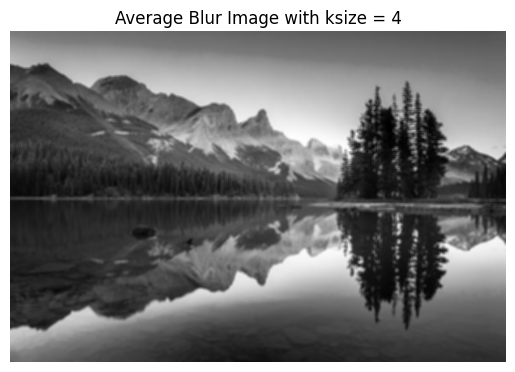

In [6]:
def average_blur_gray(img, ksize):
    box_kernal = np.ones((ksize,ksize))/(ksize*ksize)
    return convolve(img,box_kernal)

ksize = 4
plt.imshow(average_blur_gray(img_gray, ksize),cmap = 'gray')
plt.title("Average Blur Image with ksize = 4")
plt.axis("off")
plt.show()

Average Blur RGB

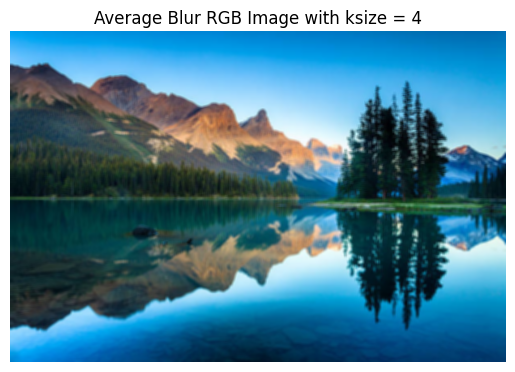

In [7]:
def average_blur_rgb(img, ksize):
    img_average_blur_rgb = np.zeros_like(img)
    for c in range(3):
        img_average_blur_rgb[:, :, c] = average_blur_gray(img[:, :, c], ksize)
    return img_average_blur_rgb

ksize = 4
plt.imshow(average_blur_rgb(img_rgb, ksize))
plt.title("Average Blur RGB Image with ksize = 4")
plt.axis("off")
plt.show()

Gaussian Kernel

In [8]:
def gaussian_kernel(ksize, sigma):

    k = ksize // 2

    x = np.arange(-k, k + 1)
    y = np.arange(-k, k + 1)

    # Creating 2D coordinate grid
    x_grid, y_grid = np.meshgrid(x, y)

    # Applying Gaussian formula
    gaussian_kernal = np.exp(-(x_grid**2 + y_grid**2) / (2 * sigma**2))/(2*np.pi*sigma**2)

    gaussian_kernel = gaussian_kernal / np.sum(gaussian_kernal)

    return gaussian_kernel

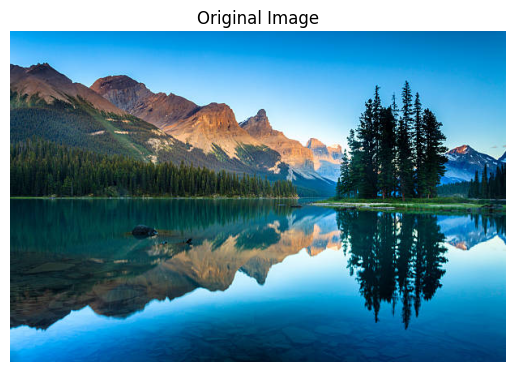

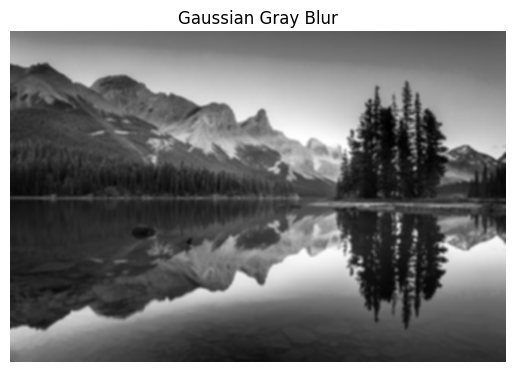

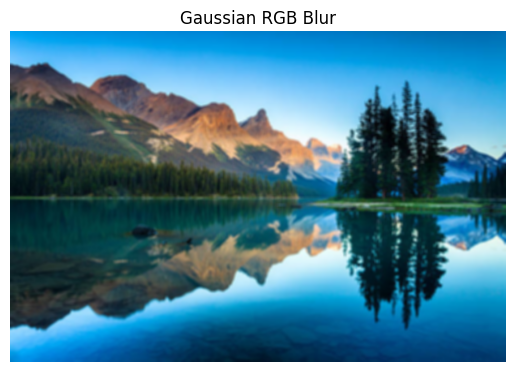

In [9]:
# Original Image
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Gaussian Gray Blur
ksize = 5
sigma = ksize/3
kernel = gaussian_kernel(ksize, sigma)
gaussian_gray = convolve(img_gray, kernel)
plt.imshow(gaussian_gray,cmap = 'gray')
plt.title("Gaussian Gray Blur")
plt.axis("off")
plt.show()

#Gaussian RGB Blur
guassian_rgb = np.zeros_like(img)

for c in range(3):
    guassian_rgb[:, :, c] = convolve(img_rgb[:, :, c],kernel)

plt.imshow(guassian_rgb)
plt.title("Gaussian RGB Blur")
plt.axis("off")
plt.show()

### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [10]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

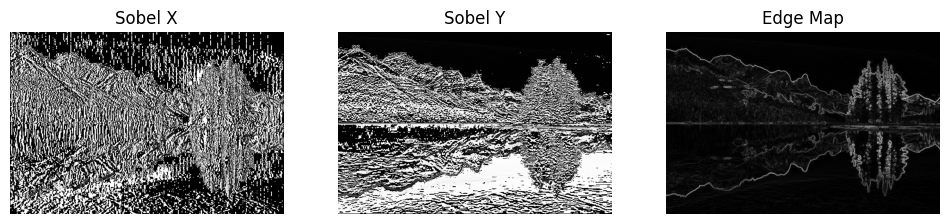

In [43]:
sobel_x = np.array([[ -1, 0, 1],[ -2, 0, 2],[ -1, 0, 1]])

sobel_y = np.array([[ -1, -2, -1],[  0,  0,  0],[  1,  2,  1]])

# Gradient in the x-direction
Gx = convolve(img_gray,sobel_x)

# Gradient in the y-direction
Gy = convolve(img_gray,sobel_y)

# Gradient magnitude
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

#Normalising in range (0,255)
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
gradient_magnitude = gradient_magnitude.astype(np.uint8)

Gx = (Gx / Gx.max()) * 255
Gx = Gx.astype(np.uint8)

Gy = (Gy / Gy.max()) * 255
Gy = Gy.astype(np.uint8)

plt.figure(figsize= (12,4))

plt.subplot(1,3,1)
plt.imshow(Gx,cmap = 'gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(Gy,cmap = 'gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(gradient_magnitude,cmap = 'gray')
plt.title("Edge Map")
plt.axis("off")
plt.show()

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [12]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Laplacian Sharpening

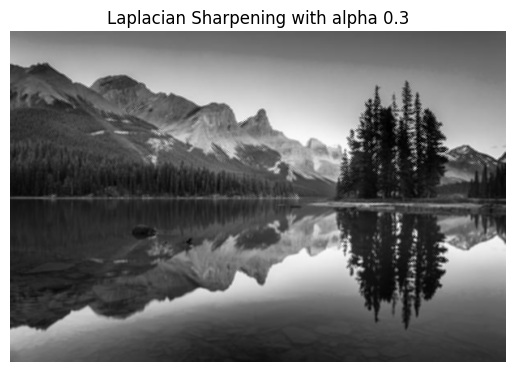

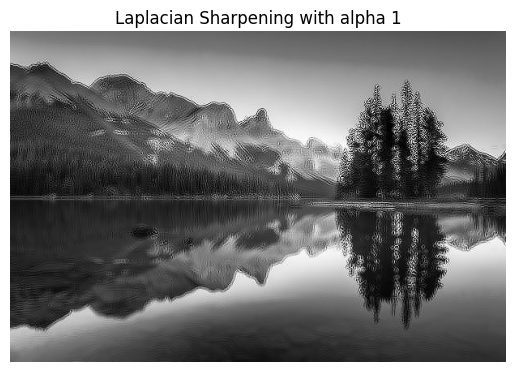

In [13]:
# Using 4 connected laplacian kernel
laplacian_kernel = np.array([[0,-1, 0],[-1,4,-1],[0, -1, 0]])

lap = convolve(img_gray,laplacian_kernel)

sharp1 = np.clip(img_gray - 0.3*lap,0,255).astype(np.uint8) # alpha = 0.3
plt.imshow(sharp1,cmap = 'gray')
plt.title("Laplacian Sharpening with alpha 0.3")
plt.axis("off")
plt.show()

sharp2 = np.clip(img_gray - lap,0,255).astype(np.uint8) # alpha = 1
plt.imshow(sharp2,cmap = 'gray')
plt.title("Laplacian Sharpening with alpha 1")
plt.axis("off")
plt.show()

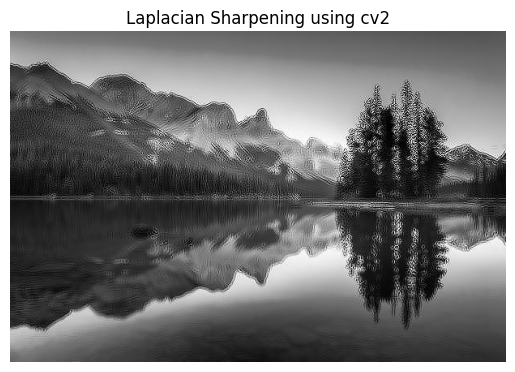

In [14]:
# Laplacian Sharpening using cv2
lap_cv = cv2.Laplacian(img_gray,cv2.CV_64F)
sharp_cv = np.clip(img_gray + lap_cv,0,255).astype(np.uint8)
plt.imshow(sharp_cv,cmap = 'gray')
plt.title("Laplacian Sharpening using cv2")
plt.axis("off")
plt.show()

In [28]:
np.array_equal(sharp2,sharp_cv)

False

Unsharp Masking

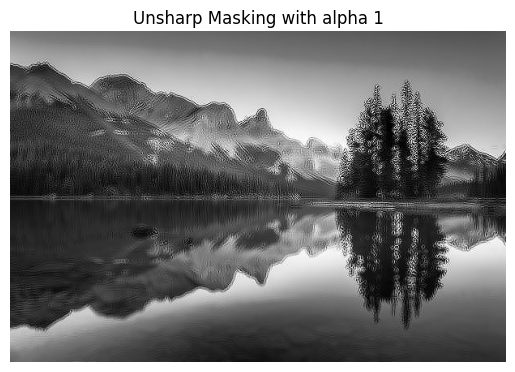

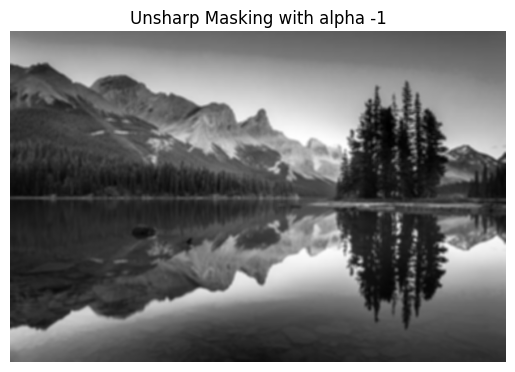

In [24]:
ksize = 5
sigma = ksize/3
kernel = gaussian_kernel(ksize, sigma)
gaussian_gray = convolve(img_gray, kernel)

mask = img_gray - gaussian_gray
unsharp_mask = img_gray + mask # alpha = 1
plt.imshow(sharp_cv,cmap = 'gray')
plt.title("Unsharp Masking with alpha 1")
plt.axis("off")
plt.show()

unsharp_mask2 = img_gray - mask # alpha = -1
plt.imshow(unsharp_mask2,cmap = 'gray')
plt.title("Unsharp Masking with alpha -1")
plt.axis("off")
plt.show()

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [16]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

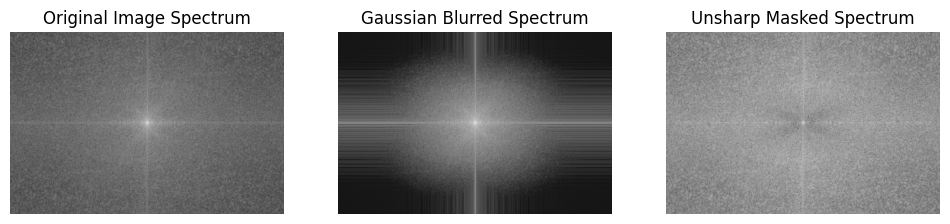

In [25]:
def magnitude_spectrum(img):
    #Converting grayscale to float
    gray_float = img.astype(np.float32)

    #FFT
    f = np.fft.fft2(gray_float)

    # Shift low frequencies to the center
    fshift = np.fft.fftshift(f)

    magnitude = 20*np.log(np.abs(fshift)+1)
    return magnitude

# Magnitude Spectrum of Original Img
mag_original = magnitude_spectrum(img_gray)

# Magnitude Spectrum of Gaussian Img
gaussian_blurred = convolve(img_gray,gaussian_kernel(8,8/6))
mag_gaussian = magnitude_spectrum(gaussian_blurred)

#Magnitude Spectrum of Unsharp Masking Img
alpha = 50
unsharp_img = img_gray + alpha*(img_gray - gaussian_blurred)
mag_unsharp  = magnitude_spectrum(unsharp_img)

plt.figure(figsize =(12,4))
plt.subplot(1,3,1)
plt.title("Original Image Spectrum")
plt.imshow(mag_original, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Gaussian Blurred Spectrum")
plt.imshow(mag_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Unsharp Masked Spectrum")
plt.imshow(mag_unsharp, cmap='gray')
plt.axis('off')

plt.show()

In [27]:
# On increasing ksize and sigma in Gaussian Blur Image, center gets brighter and outer region gets darker which gives similar result to LPF
# So, gaussian blur behaves as a LPF

# When alpha is high in unsharped masked img, center gets darker and outer region get brighter
# Unsharped Img gives result similar to HPF

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

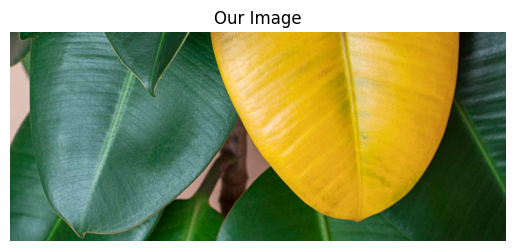

In [17]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [18]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

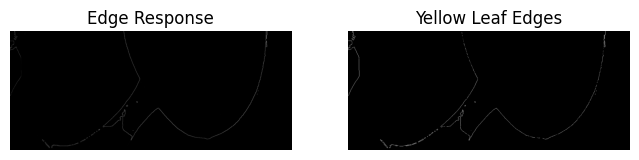

In [39]:
img_rgb5 = np.array(img_part5)
# Separating RGB channels
R = img_rgb5[:, :, 0]
G = img_rgb5[:, :, 1]
B = img_rgb5[:, :, 2]

# Yellow has R ≈ G, Green has R << G
RG_diff = R - G

# Using laplacian kernel
laplacian_kernel = np.array([[0,-1, 0],[-1,4,-1],[0, -1, 0]])

# Apply Kernel to RG Difference
edge_response = convolve(RG_diff, laplacian_kernel)

# Normalize Blue channel
B_norm = B / np.max(B)

# Yellow has low Blue, so it will retain strong edges
final_edges = np.abs(edge_response) * (1 - B_norm)

threshold = 0.25 * np.max(final_edges)
yellow_edges = edge_response > threshold

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Edge Response")
plt.imshow(final_edges, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Yellow Leaf Edges")
plt.imshow(yellow_edges, cmap='gray')
plt.axis("off")

plt.show()

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
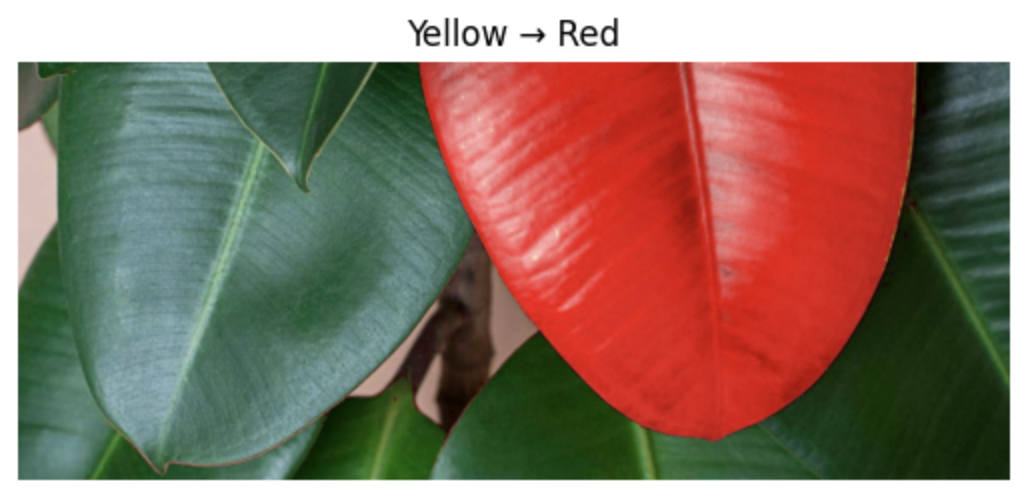

Also, we can change to a less brighter colour
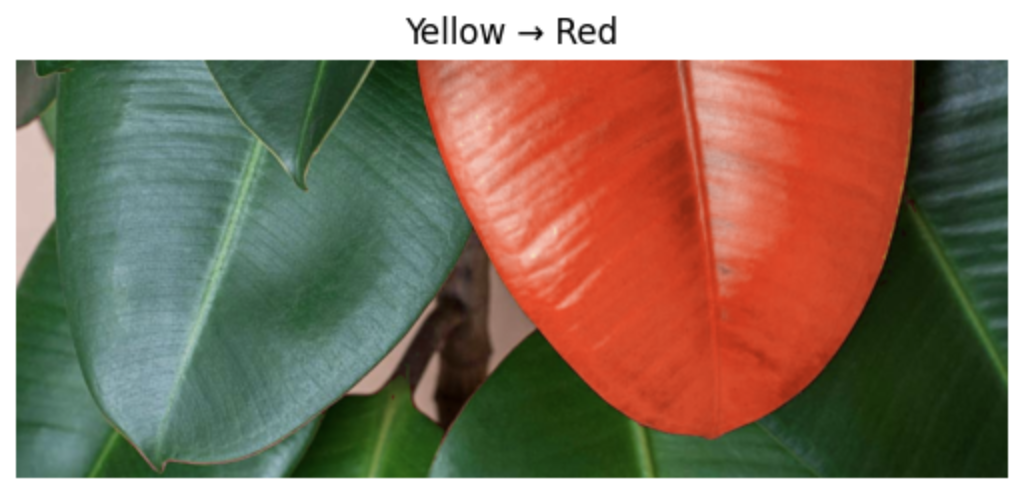

In [19]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.